# **I. UNDERSTANDING THE PROBLEM**  

## 1. Analysis objective  

- **Task:** To develop a model that can be used to predict the price of used cars based on various attributes
- **Files:**
  - `train.csv` - the training dataset
    - Here we have features + target value (price), which is the value we want to predict.
    - On this set we train the model.
    - We go through the entire process of Data Wrangling, EDA, Feature Engineering and Modeling.
  - `test.csv` - the test dataset;
    - It does not contain a price column – we need to predict this value. 
    - This dataset is what Kaggle will use to evaluate our model
  - `sample_submission.csv`
    - Shows the **expected format of the prediction file** that we should submit to Kaggle.
    - After making a prediction on `test.csv`, we create a result that follows the structure of `sample_submission.csv` (e.g. columns `id` and `price`).
    - We save our file and submit it for evaluation on the Kaggle platform.
- **Dataset:**
  -   **Brand & Model:** Identify the brand or company name along with the specific model of each vehicle.
  -   **Model Year:** Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
  -   **Mileage:** Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
  -   **Fuel Type:** Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
  -   **Engine Type:** Understand the engine specifications, shedding light on performance and efficiency.
  -   **Transmission:** Determine the transmission type, whether automatic, manual, or another variant.
  -   **Exterior & Interior Colors:** Explore the aesthetic aspects of the vehicles, including exterior and interior color options.
  -   **Accident History:** Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
  -   **Clean Title:** Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.
  -   **Price:** Access the listed prices for each vehicle, aiding in price comparison and budgeting.
- **Evaluation:** The performance of the model is evaluated using the Root Mean Squared Error (RMSE),

## 2. Key questions 

What Features Affect the Price of a Car?

## 3. Expected outcomes  

A model that predicts the price of a car based on available data

## 4. Resources

- [Used Car Price Prediction Dataset](https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset)
- [Regression of Used Car Prices Playground Series - Season 4, Episode 9](https://www.kaggle.com/competitions/playground-series-s4e9/overview)

# **II. DATA WRANGLING** *(preparing data for analysis)* 

# **1. Data Discovery** *(exploring and assessing data quality)* 







## 2.1 Imports and configuration

In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
import gc
import missingno as msno
import datetime as dt


In [360]:
class Style:
    """Klasa do łatwego formatowania tekstu w terminalu za pomocą kodów ANSI."""
    
    # Resetowanie stylu
    RESET = "\033[0m"

    # Style tekstu
    BOLD = "\033[1m"
    DIM = "\033[2m"
    ITALIC = "\033[3m"
    UNDERLINE = "\033[4m"
    BLINK = "\033[5m"
    REVERSE = "\033[7m"  # Odwrócone kolory (tło ↔ tekst)
    HIDDEN = "\033[8m"  # Ukryty tekst (widoczny dopiero po zaznaczeniu)

    # Kolory tekstu
    BLACK = "\033[30m"
    RED = "\033[31m"
    GREEN = "\033[32m"
    YELLOW = "\033[33m"
    BLUE = "\033[34m"
    MAGENTA = "\033[35m"
    CYAN = "\033[36m"
    WHITE = "\033[37m"

    # Jasne kolory tekstu
    LIGHT_BLACK = "\033[90m"
    LIGHT_RED = "\033[91m"
    LIGHT_GREEN = "\033[92m"
    LIGHT_YELLOW = "\033[93m"
    LIGHT_BLUE = "\033[94m"
    LIGHT_MAGENTA = "\033[95m"
    LIGHT_CYAN = "\033[96m"
    LIGHT_WHITE = "\033[97m"

    # Kolory tła
    BG_BLACK = "\033[40m"
    BG_RED = "\033[41m"
    BG_GREEN = "\033[42m"
    BG_YELLOW = "\033[43m"
    BG_BLUE = "\033[44m"
    BG_MAGENTA = "\033[45m"
    BG_CYAN = "\033[46m"
    BG_WHITE = "\033[47m"

    # Jasne kolory tła
    BG_LIGHT_BLACK = "\033[100m"
    BG_LIGHT_RED = "\033[101m"
    BG_LIGHT_GREEN = "\033[102m"
    BG_LIGHT_YELLOW = "\033[103m"
    BG_LIGHT_BLUE = "\033[104m"
    BG_LIGHT_MAGENTA = "\033[105m"
    BG_LIGHT_CYAN = "\033[106m"
    BG_LIGHT_WHITE = "\033[107m"


In [361]:
def style_dataframe(df):
    """
    Applies a consistent styling to the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to style.

    Returns:
    pd.io.formats.style.Styler: The styled DataFrame.
    """
    return df.style.set_table_styles(
        [{
            'selector': 'thead th',
            'props': [
                ('background-color', '#FF6F61'),  # Coral Red background for header
                ('color', '#FFFFFF'),  # White text for header
                ('font-weight', 'bold'),
                ('text-align', 'center'),
                ('border', '1px solid #FFAB40')  # Orange border for header
            ]
        }, {
            'selector': 'tbody td',
            'props': [
                ('background-color', '#F5F5F5'),  # Light gray background for cells
                ('border', '1px solid #DCDCDC'),  # Light gray border for cells
                ('font-weight', 'normal'),
                ('color', '#333333')  # Dark Gray text for readability
            ]
        }]
    ).set_properties(**{'text-align': 'center'}).set_table_attributes('style="width:100%;"').hide(axis='index')

## 2.1 Dataset overview  

In [362]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [363]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [364]:
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


## 2.2 Number of records and columns

In [365]:
df_dict = {"df_train": df_train, "df_test": df_test}

for name, df in df_dict.items():
    print(f"\n{name} - number of records {df.shape[0]}, number of columns {df.shape[1]}")


df_train - number of records 188533, number of columns 13

df_test - number of records 125690, number of columns 12


## 2.3 Data types and interpretation

In [366]:
for name, df in df_dict.items():
    print(f"\n{'='*50}") 
    print(f"🔍 {name}")
    print(f"{'='*50}")
    print(f"\033[1mDataFrame Info for: {name}\033[0m")  
    print(f"{df.info()}\n")


🔍 df_train
DataFrame Info for: df_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
None


🔍 df_test
DataFrame Info for: df_test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 column

### Categorize the features into numerical and categorical types for further analysis

In [367]:
features = df_train.columns.to_list()[:-1]
target = 'price'

numeric_features = df_train.select_dtypes(include='number').columns.to_list()
if target in numeric_features:
    numeric_features.remove(target)

categorical_features = df_train.select_dtypes(include='object').columns.to_list()

In [368]:
print('>> Numerical Features \n', numeric_features, '\n')
print('>> Categorical Features \n', categorical_features, '\n')

>> Numerical Features 
 ['id', 'model_year', 'milage'] 

>> Categorical Features 
 ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'] 



## 2.4 Unique Values 

In [369]:
def check_unique_values(dataset, dataset_name):
    print(f"\n{'='*50}")
    print(f"🔍 Unique Values Report for: {dataset_name}")
    print(f"{'='*50}")

    unique_values = dataset.apply(lambda x: x.nunique())
    print("\nNumber of unique values per column:")
    print(unique_values)

    object_columns = dataset.select_dtypes(include=['object']).columns
    for col in object_columns:
        print(f"\nUnique values in column '{col}':")
        print(dataset[col].unique())

for name, df in df_dict.items():
    check_unique_values(df, name)


🔍 Unique Values Report for: df_train

Number of unique values per column:
id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64

Unique values in column 'brand':
['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Tesla' 'Cadillac' 'Land' 'GMC' 'Toyota' 'Hyundai' 'Volvo'
 'Volkswagen' 'Buick' 'Rivian' 'RAM' 'Hummer' 'Alfa' 'INFINITI' 'Jeep'
 'Porsche' 'McLaren' 'Honda' 'Lexus' 'Dodge' 'Nissan' 'Jaguar' 'Acura'
 'Kia' 'Mitsubishi' 'Rolls-Royce' 'Maserati' 'Pontiac' 'Saturn' 'Bentley'
 'Mazda' 'Subaru' 'Ferrari' 'Aston' 'Lamborghini' 'Chrysler' 'Lucid'
 'Lotus' 'Scion' 'smart' 'Karma' 'Plymouth' 'Suzuki' 'FIAT' 'Saab'
 'Bugatti' 'Mercury' 'Polestar' 'Maybach']

Unique values in column 'model':
['Cooper S Bas

### **Report Interpretation**

#### 🔹 **df\_train**

- `id`: 188,533 unique values ​​→ each car has a unique identifier.
- `brand`: 57 unique brands → the dataset contains cars from 57 different manufacturers.
  
   - [ ] **Problem to solve**: Some Brands are written in capital letters
  
- `model`: 1,897 unique models → a wide variety of vehicles.
- `model_year`: 34 unique values ​​→ the data includes cars from different years.
- `milage`: 6651 unique values ​​→ large mileage discrepancy.
- `fuel_type`: 7 unique values
  
   - [ ] **Problem to solve**: `nan` and `–` occur → possible missing or incorrect data.
  
- `engine`: 1117 unique values ​​→ various engine capacities and powers.
  
   - [ ] **Problem to solve**: Contains much crucial information like engine horsepower, capacity, no of cylinders hybrid, electric. We can extract data from this
  
- `transmission`: 52 unique values
  
   - [ ] **Problem to solve**: strange entries occur like `F`, `2`, `SCHEDULED FOR OR IN PRODUCTION` → there may be errors in the data.

- `ext_col` (body color): 319 unique values ​​→ includes colors
  
   - [ ] **Problem to solve**: lack of systematic writing of color names, e.g.: BLUE, BLU ELEOS and the sign '-'
  
- `int_col` (interior color): 156 unique values.
  
   - [ ] **Problem to solve**: lack of systematic writing of color names, e.g.: BLUE, BLU ELEOS and the sign '-'
  
- `accident`: 2 values 
  
   - [ ] **Problem to solve**: NaN appears, which can be treated as either no data or "none reported"

- `clean_title`: only **1 unique value** 
  
   - [ ] **Problem to solve**: NaN appears, and all vehicles have "clean title", which may be a bug or a specific feature of the dataset.

- `price`: 1569 unique values ​​→ various prices.

## 2.5 Missing values  

In [370]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = df_train.isnull().mean() * 100
    
result = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
result[result['Percent'] > 0]

,Total,Percent
clean_title,21419,11.360876
fuel_type,5083,2.696080
accident,2452,1.300568


In [371]:
def plot_missing_values(dataset, dataset_name):
    percent = dataset.isnull().mean() * 100
    missing_df = pd.DataFrame({'column': percent.index, 'missing_ratio': percent.values})

    plt.figure(figsize=(15, 6))
    plt.grid(True)
    ax = sns.barplot(x='column', y='missing_ratio', data=missing_df[missing_df['missing_ratio'] > 0], color='#ac1106')
        
    plt.xticks(rotation=45, ha='right', fontsize = 14)
    plt.xlabel('')
        
    plt.title(f"Missing Data in {dataset_name}", fontsize = 20)
        
    plt.yticks(range(0, 41, 10), fontsize = 14)
    plt.ylabel('Missing Values ratio(%)', fontsize = 12)
        
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.8,
                '{:.1f}%'.format(height),
                ha="center")
        
    plt.tight_layout()
    plt.show()


def report_missing_data(dataset, dataset_name):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = dataset.isnull().mean() * 100
    
    result = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    print(f"🔴 Missing Data Report for: {dataset_name}")
    print(f"{'-'*50}")

    print(result[result['Percent'] > 0])

    if dataset.isnull().sum().sum() != 0:
        print(f"\n⚠️ Missing Data Matrix for: {dataset_name}")
        plt.figure(figsize=(10, 5))  
        msno.matrix(dataset)
        plt.title(f"Missing Data in {dataset_name}", fontsize=14) 
        plt.show()

        plot_missing_values(dataset, dataset_name)



🔍 Report for: df_train
🔴 Missing Data Report for: df_train
--------------------------------------------------
             Total    Percent
clean_title  21419  11.360876
fuel_type     5083   2.696080
accident      2452   1.300568

⚠️ Missing Data Matrix for: df_train


<Figure size 1000x500 with 0 Axes>

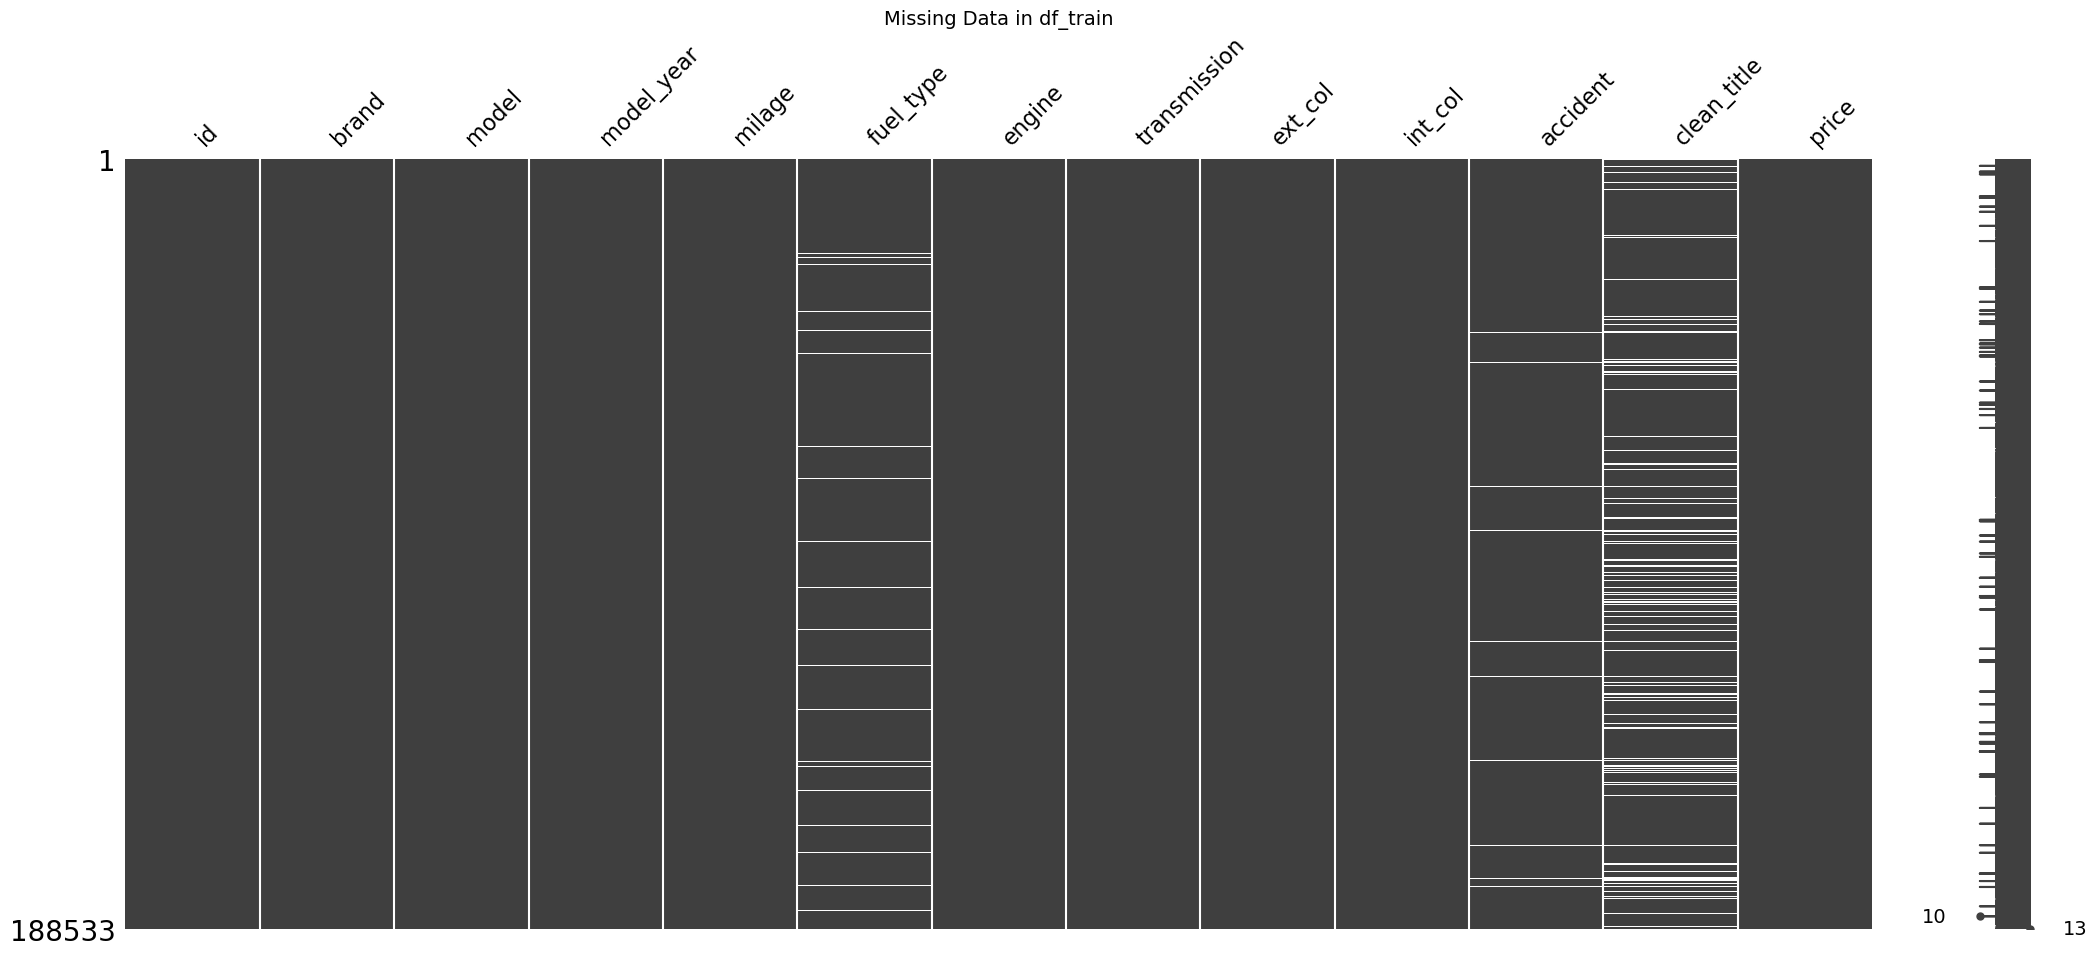

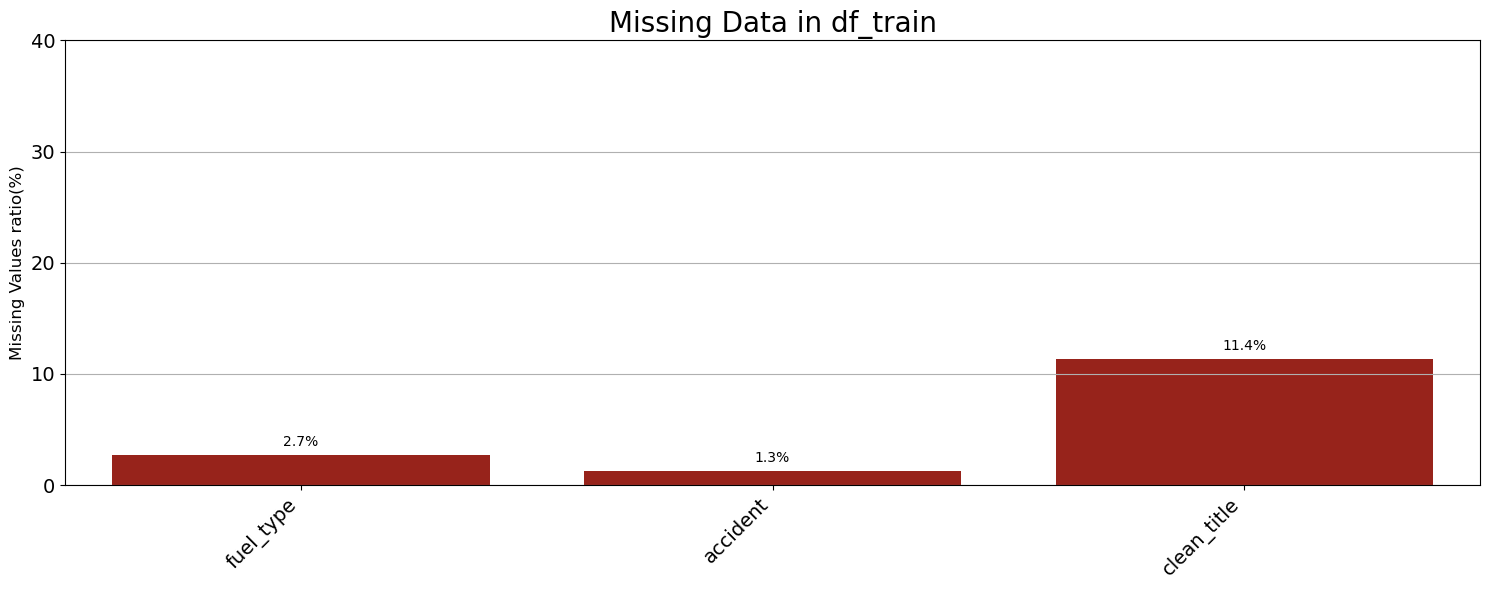


🔍 Report for: df_test
🔴 Missing Data Report for: df_test
--------------------------------------------------
             Total    Percent
clean_title  14239  11.328666
fuel_type     3383   2.691543
accident      1632   1.298433

⚠️ Missing Data Matrix for: df_test


<Figure size 1000x500 with 0 Axes>

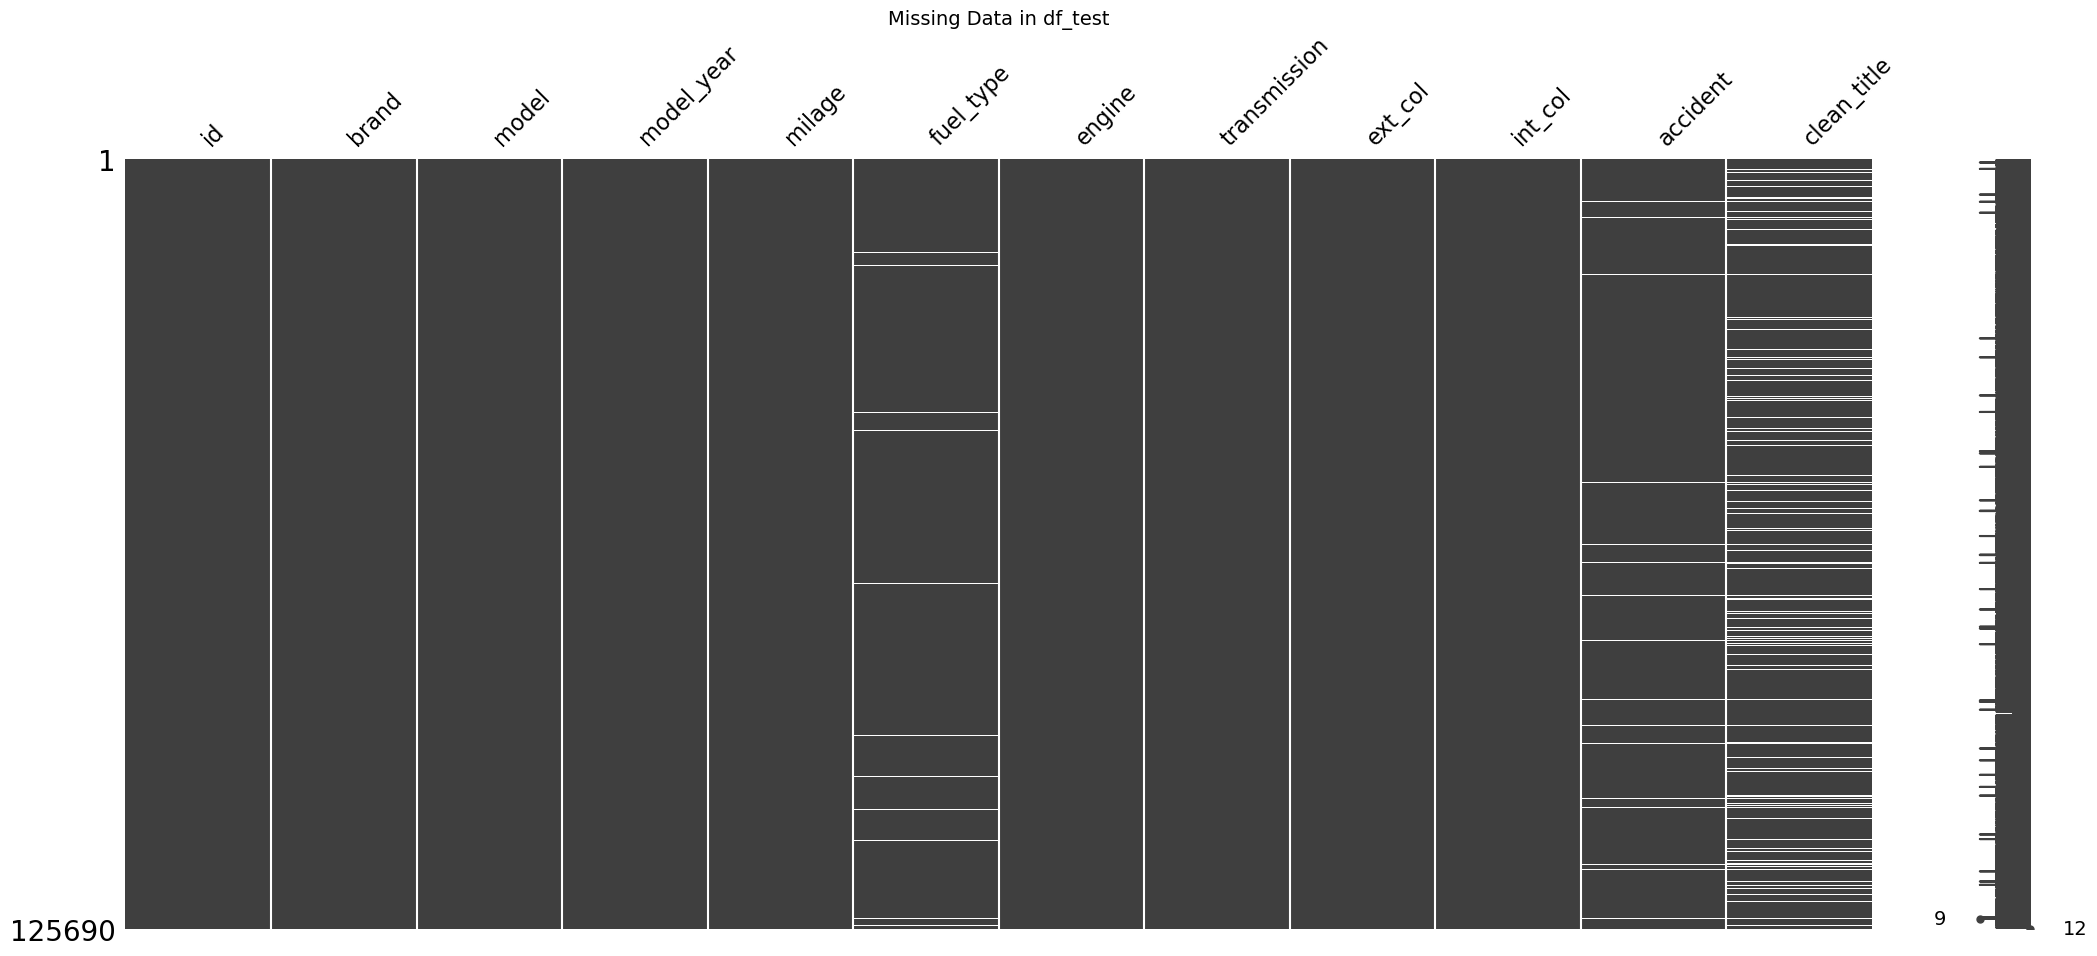

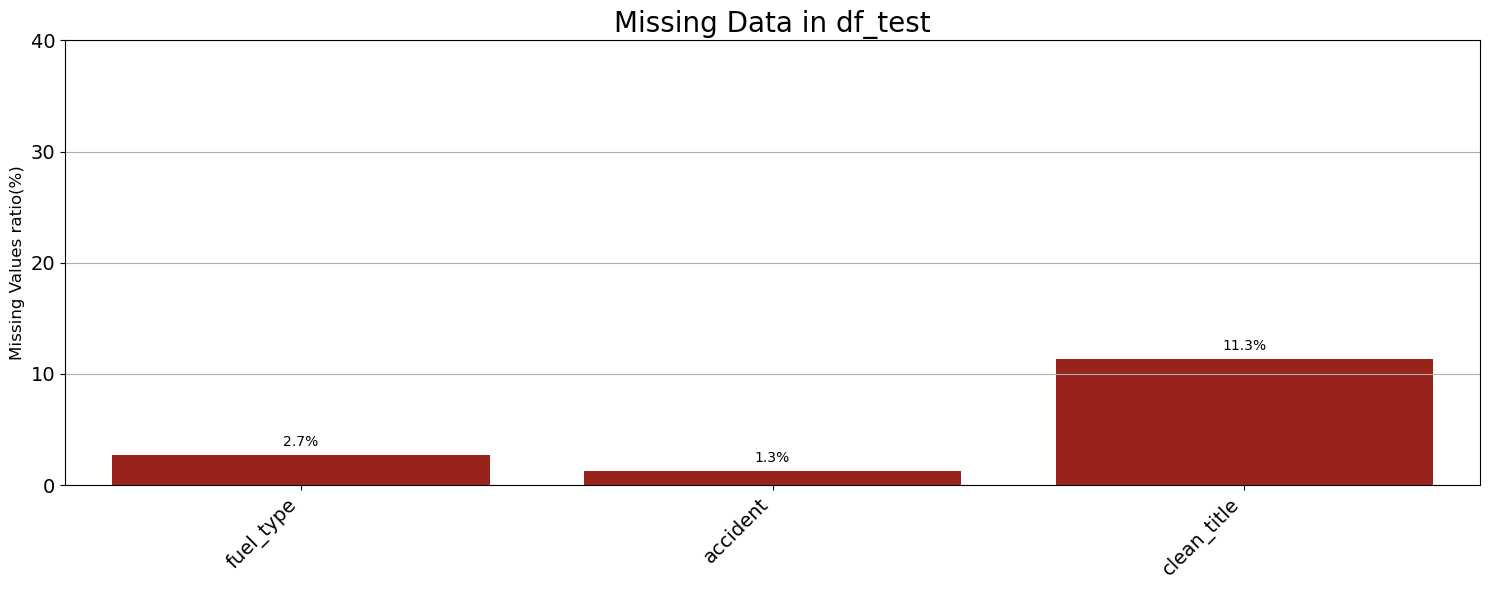

In [372]:
for name, df in df_dict.items():
    print(f"\n{'='*50}")  # Linia oddzielająca
    print(f"🔍 Report for: {name}")
    print(f"{'='*50}")
    report_missing_data(df, name)

In [373]:
df_train.loc[:, df_train.isnull().any()]

,fuel_type,accident,clean_title
0,Gasoline,None reported,Yes
1,Gasoline,At least 1 accident or damage reported,Yes
2,E85 Flex Fuel,None reported,Yes
3,Gasoline,None reported,Yes
4,Gasoline,None reported,Yes
...,...,...,...
188528,Gasoline,None reported,Yes
188529,Gasoline,At least 1 accident or damage reported,Yes
188530,Gasoline,None reported,Yes
188531,Gasoline,None reported,NaN


### Report interpretation for **df_sample** and **df_train**:

#### **🔍 Report for: df_train**
- **Missing Data**:
- **Column `clean_title`**: 21,419 missing values, which is **11.36%** of all data. This may suggest that not all vehicles in the set have information about whether the vehicle title is "clean" (e.g. no accidents).
- **Column `fuel_type`**: 5,083 missing values, which is **2.70%** of all data which indicate that not every vehicle has this attribute in the dataset.
- **Column `accident`**: 2,452 missing values, which is **1.30%** of all data, which indicate that information about accident history is missing in some records.
- **The remaining columns** (including: `id`, `brand`, `model`, `price`, `milage`, `engine`, `transmission`, `ext_col`, `int_col`) have no missing data.






## 2.6 Duplicates

In [374]:
def check_duplicates(dataset, dataset_name):
    print(f"\n{'='*50}")
    print(f"🔍 Duplicate Values Report for: {dataset_name}")
    print(f"{'='*50}")
    
    total_duplicates = dataset.duplicated().sum()  # Liczba zduplikowanych wierszy
    print(f"\nTotal number of duplicate rows: {total_duplicates}")
    
    if total_duplicates > 0:
        print("\nDuplicate rows in the dataset:")
        print(dataset[dataset.duplicated()])
    
    print(f"\nChecking duplicates in each column:")
    for col in dataset.columns:
        duplicate_values = dataset[col].duplicated().sum()
        print(f"Column '{col}' has {duplicate_values} duplicate values")
    
    print(f"{'='*50}\n")

for name, df in df_dict.items():
    check_duplicates(df, name)


🔍 Duplicate Values Report for: df_train

Total number of duplicate rows: 0

Checking duplicates in each column:
Column 'id' has 0 duplicate values
Column 'brand' has 188476 duplicate values
Column 'model' has 186636 duplicate values
Column 'model_year' has 188499 duplicate values
Column 'milage' has 181882 duplicate values
Column 'fuel_type' has 188525 duplicate values
Column 'engine' has 187416 duplicate values
Column 'transmission' has 188481 duplicate values
Column 'ext_col' has 188214 duplicate values
Column 'int_col' has 188377 duplicate values
Column 'accident' has 188530 duplicate values
Column 'clean_title' has 188531 duplicate values
Column 'price' has 186964 duplicate values


🔍 Duplicate Values Report for: df_test

Total number of duplicate rows: 0

Checking duplicates in each column:
Column 'id' has 0 duplicate values
Column 'brand' has 125635 duplicate values
Column 'model' has 123799 duplicate values
Column 'model_year' has 125654 duplicate values
Column 'milage' has 119

### Interpretation of the report for **duplicates** in **df_sample**, **df_train**, and **df_test**:


#### **🔍 Duplicate Values ​​Report for: df_train**

**Interpretation**:
- In **df_train** the rows are unique, but there are a huge number of duplicates in many columns. For example, columns like `brand`, `model`, `model_year`, `fuel_type`, `price`, etc. contain hundreds of thousands of duplicates.
- These duplicates may mean that many vehicles in the dataset have the same properties, e.g. make, model, year of manufacture, fuel type and other features.

#### **🔍 Duplicate Values ​​Report for: df_test**

**Interpretation**:
- In **df_test** there are also no duplicates in rows, but similarly to **df_train** there are a huge number of duplicates in many columns.




## 2.8 Outliers


🔍 Outliers Report for: df_train

Checking outliers in column: id


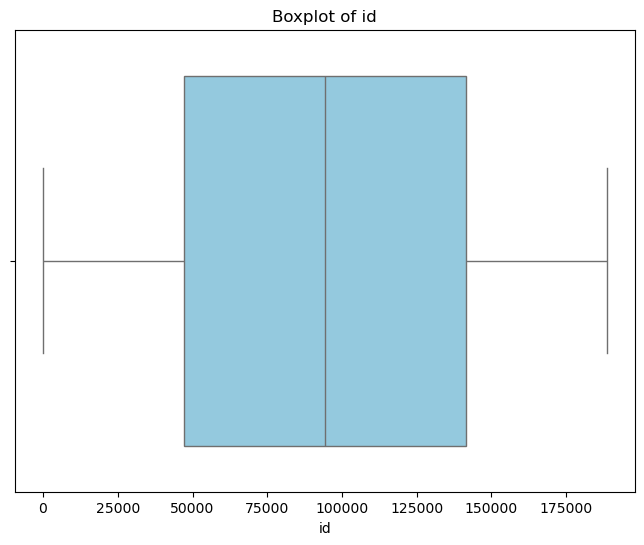


Outliers based on IQR (<= -94266.0 or >= 282798.0):
Empty DataFrame
Columns: [id]
Index: []

Outliers based on Z-score (Z-score > 3 or < -3):
Empty DataFrame
Columns: [id]
Index: []

Checking outliers in column: model_year


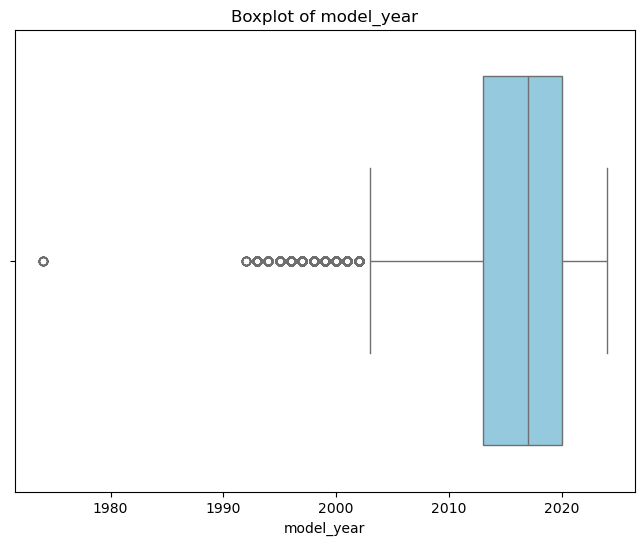


Outliers based on IQR (<= 2002.5 or >= 2030.5):
        model_year
1             2002
2             2002
59            2001
81            2000
88            2002
...            ...
188464        2002
188475        2000
188477        2000
188479        2002
188527        1999

[5132 rows x 1 columns]

Outliers based on Z-score (Z-score > 3 or < -3):
        model_year
456           1997
461           1998
531           1997
916           1997
1296          1998
...            ...
187744        1997
187964        1993
188089        1998
188189        1994
188222        1997

[1204 rows x 1 columns]

Checking outliers in column: milage


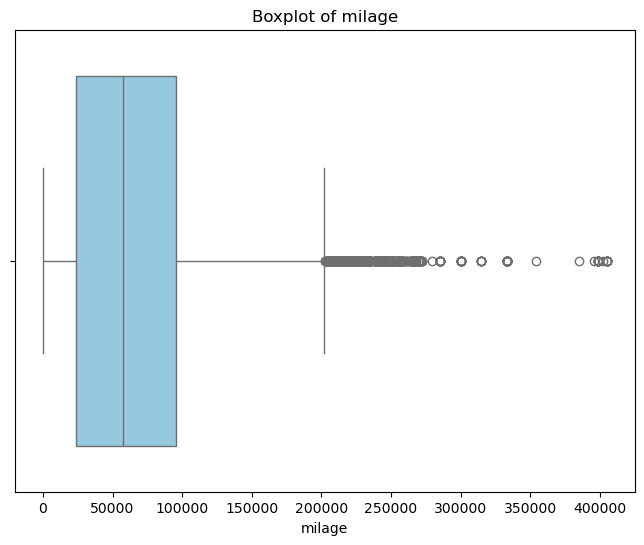


Outliers based on IQR (<= -82812.5 or >= 202327.5):
        milage
0       213000
10      212500
28      244200
195     269885
424     215000
...        ...
187708  245000
188047  249083
188092  205000
188160  220000
188523  239000

[1766 rows x 1 columns]

Outliers based on Z-score (Z-score > 3 or < -3):
        milage
28      244200
195     269885
517     245000
535     242000
824     230000
...        ...
187591  239000
187708  245000
188047  249083
188160  220000
188523  239000

[1200 rows x 1 columns]

Checking outliers in column: price


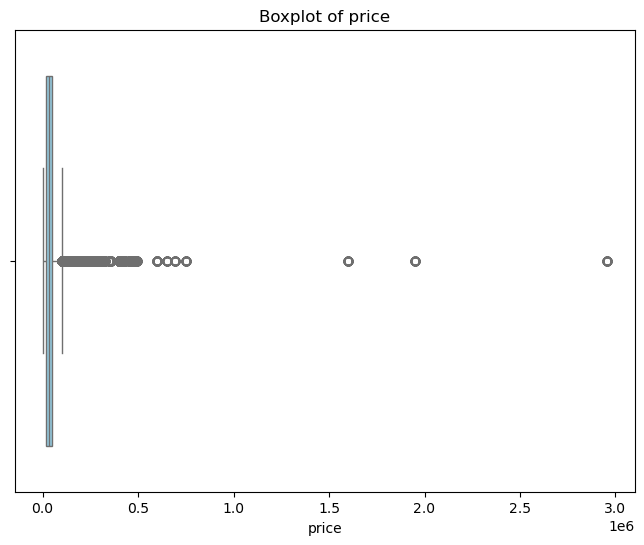


Outliers based on IQR (<= -32350.0 or >= 99250.0):
         price
31      104900
36      165000
43      244896
44      145000
65      193063
...        ...
188463  199991
188469  149900
188476  267950
188485  115000
188501  129000

[10880 rows x 1 columns]

Outliers based on Z-score (Z-score > 3 or < -3):
          price
220     2954083
267      315000
296      489000
350      349950
433      449995
...         ...
187912   469900
187915   324995
188022   359991
188192   324995
188194  1950995

[1315 rows x 1 columns]


🔍 Outliers Report for: df_test

Checking outliers in column: id


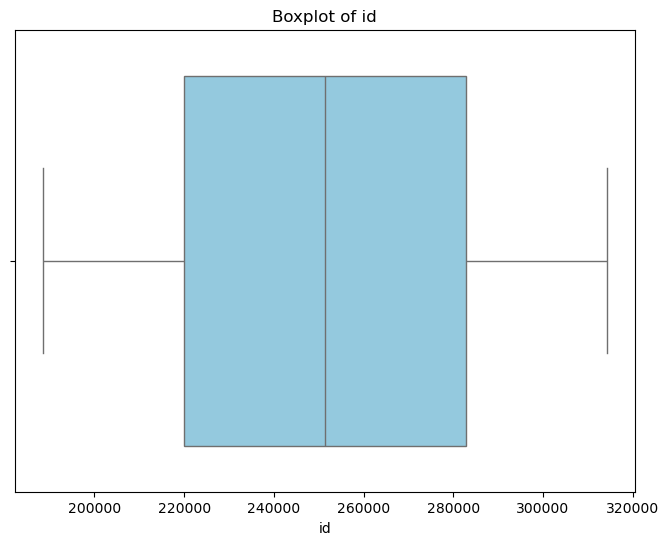


Outliers based on IQR (<= 125688.5 or >= 377066.5):
Empty DataFrame
Columns: [id]
Index: []

Outliers based on Z-score (Z-score > 3 or < -3):
Empty DataFrame
Columns: [id]
Index: []

Checking outliers in column: model_year


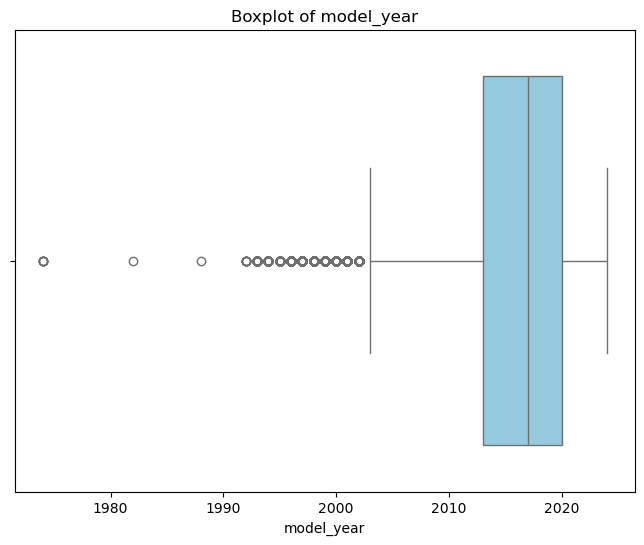


Outliers based on IQR (<= 2002.5 or >= 2030.5):
        model_year
11            2002
87            2001
114           2000
315           2002
327           1999
...            ...
125269        2002
125303        2002
125403        2001
125418        2001
125678        2002

[3516 rows x 1 columns]

Outliers based on Z-score (Z-score > 3 or < -3):
        model_year
648           1997
991           1993
1008          1994
1012          1998
1048          1997
...            ...
124604        1994
124669        1993
124879        1996
125101        1994
125208        1996

[836 rows x 1 columns]

Checking outliers in column: milage


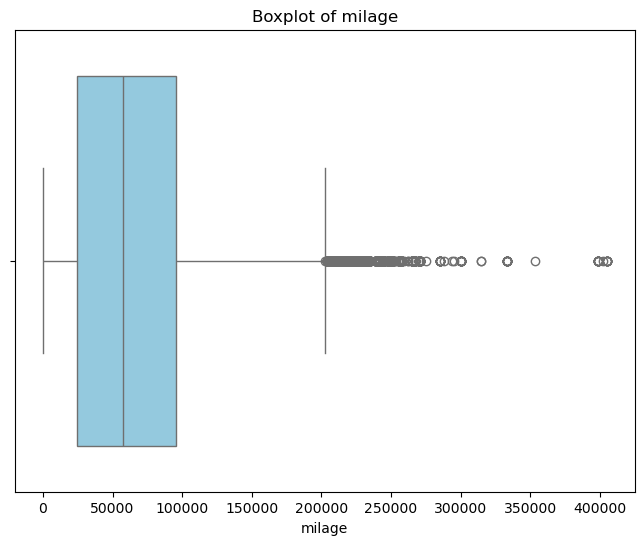


Outliers based on IQR (<= -82447.0 or >= 202745.0):
        milage
121     239000
129     204884
142     207100
150     229000
257     215000
...        ...
125146  212000
125287  205000
125403  239000
125462  215000
125521  218000

[1353 rows x 1 columns]

Outliers based on Z-score (Z-score > 3 or < -3):
        milage
121     239000
150     229000
559     333361
803     249083
812     240000
...        ...
124710  256000
124957  244200
124990  227010
125403  239000
125521  218000

[881 rows x 1 columns]



In [375]:
from scipy.stats import zscore


def check_outliers(dataset, dataset_name):
    print(f"\n{'='*50}")
    print(f"{Style.BLUE}🔍 Outliers Report for: {dataset_name}{Style.RESET}")
    print(f"{'='*50}")
    
    # Sprawdzenie dla zmiennych numerycznych
    numerical_cols = dataset.select_dtypes(include=[np.number]).columns
    
    for col in numerical_cols:
        print(f"\n{Style.BOLD}Checking outliers in column:{Style.RESET} {Style.RED}{col}{Style.RESET}")
        
        # 1. Wykres pudełkowy
        plt.figure(figsize=(8,6))
        sns.boxplot(x=dataset[col], color='skyblue')
        plt.title(f"Boxplot of {col}")
        plt.show()

        # 2. Zidentyfikowanie wartości odstających przy użyciu IQR
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Wartości odstające według IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
        
        print(f"\nOutliers based on IQR (<= {lower_bound} or >= {upper_bound}):")
        print(outliers_iqr[[col]])
        
        # 3. Z-score: Używamy Z-score do znalezienia wartości odstających
        z_scores = zscore(dataset[col].dropna())
        outliers_zscore = dataset[np.abs(z_scores) > 3]
        
        print(f"\nOutliers based on Z-score (Z-score > 3 or < -3):")
        print(outliers_zscore[[col]])

    print(f"{'='*50}\n")

# Iterowanie po słowniku df_dict i wywoływanie funkcji check_outliers
for name, df in df_dict.items():
    check_outliers(df, name)

## Summary

**🎍Data Quality Issues Identified:**

- 🎟 `Missing Values:` 
  - **fuel_type**: 2.69% missing (4,040 entries missing) + `fueal_type` has `-` and `nan`
  - **accident**: 1.28% missing (1,923 entries missing) + `accident` has nan
  - **clean_title**: 11.32% missing (16,981 entries missing) + `clean_title` has nan
  - Impute missing values using mode or a constant placeholder such as 'Unknown' for categorical columns.

- 🥽 `Text/Formating Modification`: 
  - `transmission` - contains errors like '-', '2', 'F', 'Variable', 'SCHEDULED FOR OR IN PRODUCTION'
  - `exit_color` - systematize names - e.g. is 'BLACK'
  - `Brand` - here it looks like there are values ​​that are written in capital letters.


- 🧵 `High Cardinality`: Columns like brand, transmission, ext_col, and int_col have many unique values (rare categories).
  
  - Consider grouping rare categories into a single "Other" category to reduce cardinality. For ext_col and int_col, which have high cardinality, consider using hash encoding or text embedding techniques.

- 🎢 `Outliers`: milage: Contains 1,413 outliers with values exceeding the upper bound (202,259.50) or lower than the lower bound (-82,624.50). price: Contains 8,637 outliers exceeding the upper bound (99,237.50) or lower than the lower bound (-32,342.50).
  
  - Cap or remove outliers to improve model robustness. one can cap at the upper bound or use IQR-based filtering.


- 🎍 `Possible Date-Time Column`: model_year is recognized as a potential date-time column, which could represent the age of the vehicle. Suggestions: Transform model_year into a feature representing the vehicle's age by calculating the difference from the current year.


- 🧵 `Encoding`: 

  - `engine` - Engine field contains much crucial information like engine horse power, capacity, no of cylinders hybrid, electric etc. May require decoding and creating new columns






# **2 Cleaning** *(data cleaning process)* 

## 2.1 Cleaning data

### 2.1.1 Standardizing column names and values 

In [376]:
def check_column_names(dataset, dataset_name):
    print(f"\n{'='*50}")
    print(f"🔍 Column Name Check for: {dataset_name}")
    print(f"{'='*50}")
    
    # 1. Sprawdzenie obecności spacji w nazwach kolumn
    original_columns = dataset.columns
    print(f"\nOriginal column names: {original_columns.tolist()}")
    
    # 2. Usuwanie spacji i zamiana na małe litery
    clean_columns = [col.strip().lower().replace(' ', '_') for col in original_columns]
    dataset.columns = clean_columns
    
    print(f"\nCleaned column names: {dataset.columns.tolist()}")
    
    # 3. Sprawdzanie duplikatów w nazwach kolumn
    duplicate_columns = dataset.columns[dataset.columns.duplicated()]
    
    if len(duplicate_columns) > 0:
        print(f"\nDuplicate columns found: {duplicate_columns.tolist()}")
    else:
        print("\nNo duplicate columns found.")
    
    print(f"{'='*50}\n")

# Iterowanie po słowniku df_dict i wywoływanie funkcji check_column_names
for name, df in df_dict.items():
    check_column_names(df, name)


🔍 Column Name Check for: df_train

Original column names: ['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']

Cleaned column names: ['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']

No duplicate columns found.


🔍 Column Name Check for: df_test

Original column names: ['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

Cleaned column names: ['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

No duplicate columns found.



### 2.1.3 Handling missing values (imputation or removal)  

The missing values in 'fuel_type' are likely due to human error, whereas the missing values in 'accident' and 'clean_title' seem to be intentional omissions by the respondents.

The respondents may have intentionally chosen not to answer the survey in order to hide the fact that they do not have a clean title or have a history of accidents.



In [377]:
for col in ['fuel_type', 'accident', 'clean_title']:
    print(f"{'-'*30}")
    print(f"{df_train[col].value_counts()}")

------------------------------
fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64
------------------------------
accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64
------------------------------
clean_title
Yes    167114
Name: count, dtype: int64


In [378]:
missing_train = df_train.isna().mean() * 100
missing_test = df_test.isna().mean() * 100

print("Columns in df_train with more than 10% missing values:")
print(missing_train[missing_train > 0])

print("\nColumns in df_test with more than 10% missing values:")
print(missing_test[missing_test > 0])

Columns in df_train with more than 10% missing values:
fuel_type       2.696080
accident        1.300568
clean_title    11.360876
dtype: float64

Columns in df_test with more than 10% missing values:
fuel_type       2.691543
accident        1.298433
clean_title    11.328666
dtype: float64


/tmp/ipykernel_28928/3726948150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


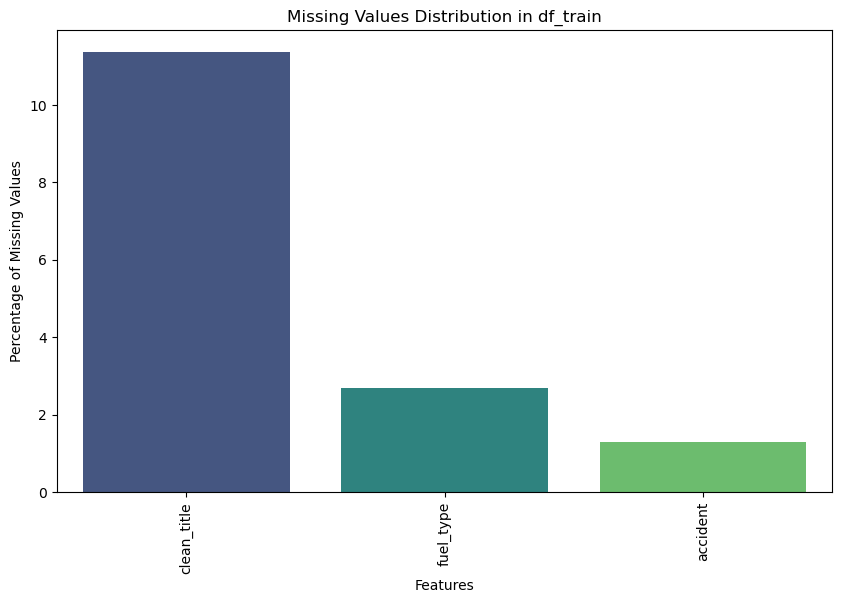

In [379]:
missing_values = df_train.isnull().mean() * 100
missing_values = missing_values[missing_values >0]
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Distribution in df_train')
plt.show()

Therefore, I'll use the Imputer function to fill in the missing values in 'fuel_type' with the most frequent value, and I'll label the missing values in 'accident' and 'clean_title' as 'missing.'

In [380]:
from sklearn.impute import SimpleImputer


def cleaning_data(df):
    fuel_imputer = SimpleImputer(strategy='most_frequent')
    df['fuel_type'] = fuel_imputer.fit_transform(df[['fuel_type']]).ravel()

    missing_label_imputer = SimpleImputer(strategy='constant', fill_value='missing')
    df[['accident', 'clean_title']] = missing_label_imputer.fit_transform(df[['accident', 'clean_title']])

    return df

df_train_without_missing_vals = cleaning_data(df_train)
df_test_without_missing_vals = cleaning_data(df_test)

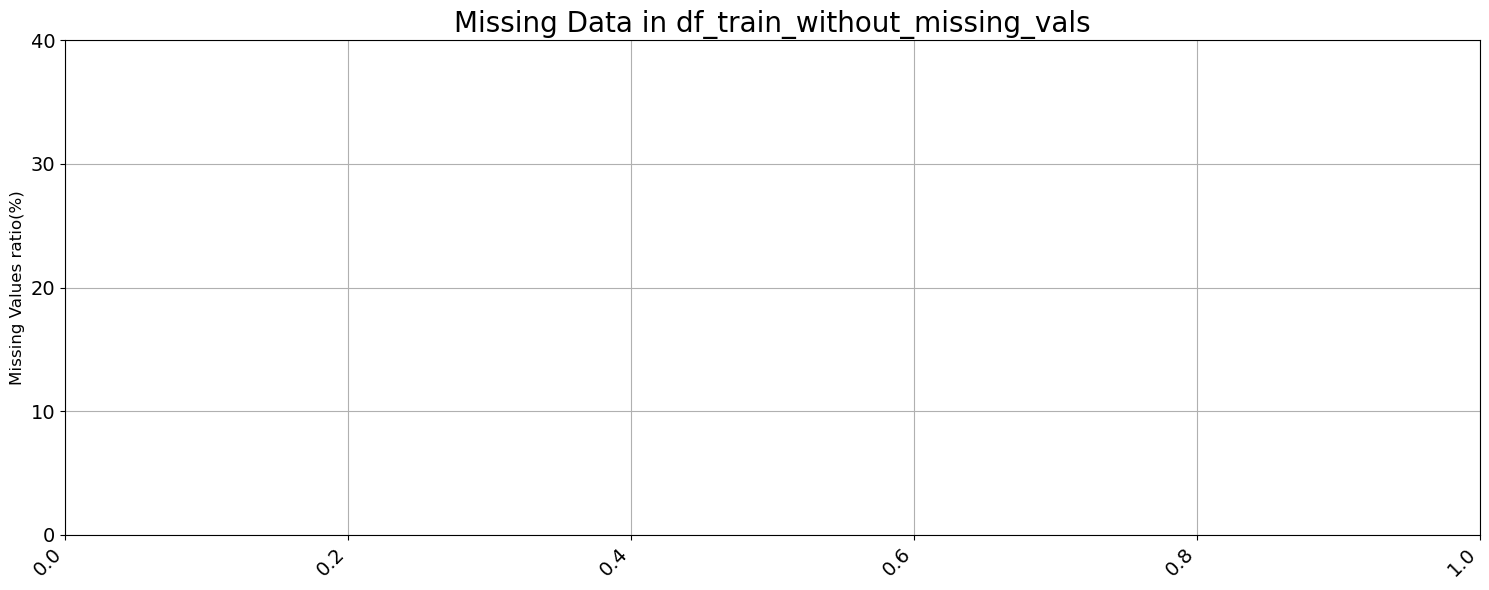

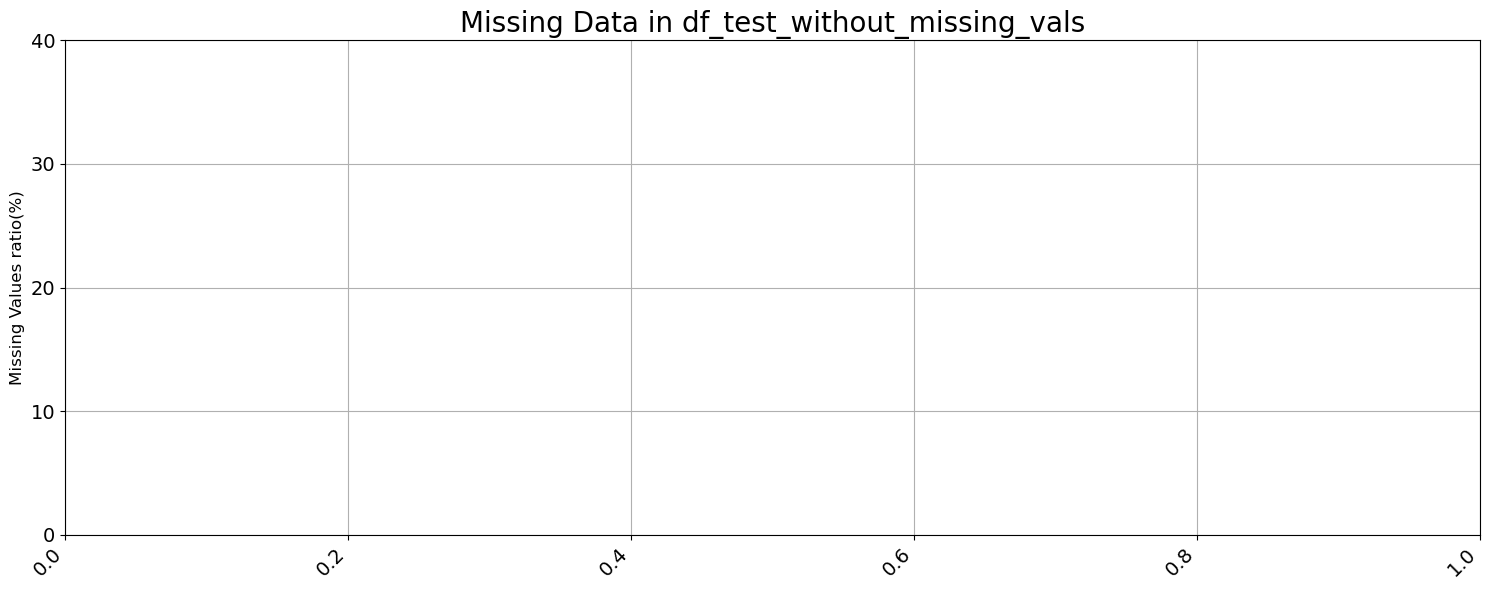

In [381]:
plot_missing_values(df_train_without_missing_vals, 'df_train_without_missing_vals')
plot_missing_values(df_test_without_missing_vals, 'df_test_without_missing_vals')

In [382]:
df_train_without_missing_vals.shape

(188533, 13)

In [383]:
df_test_without_missing_vals.shape

(125690, 12)

## 2.2 Standardization of data

### Data type conversions

In [384]:
df_train_without_missing_vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     188533 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      188533 non-null  object
 11  clean_title   188533 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


We can convert the model year to a datetime type to later create a column with the car's age

In [385]:
print(set(df_train_without_missing_vals['model_year']))

{1974, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024}


In [386]:
df_train_without_missing_vals['model_year'] = pd.to_datetime(df_train_without_missing_vals['model_year'], format='%Y', errors='coerce')
df_test_without_missing_vals['model_year'] = pd.to_datetime(df_test_without_missing_vals['model_year'], format='%Y', errors='coerce')

In [387]:
print(set(df_train_without_missing_vals['model_year']))

{Timestamp('1994-01-01 00:00:00'), Timestamp('1995-01-01 00:00:00'), Timestamp('2018-01-01 00:00:00'), Timestamp('2009-01-01 00:00:00'), Timestamp('2017-01-01 00:00:00'), Timestamp('2012-01-01 00:00:00'), Timestamp('1996-01-01 00:00:00'), Timestamp('2005-01-01 00:00:00'), Timestamp('2020-01-01 00:00:00'), Timestamp('2021-01-01 00:00:00'), Timestamp('1992-01-01 00:00:00'), Timestamp('2006-01-01 00:00:00'), Timestamp('1999-01-01 00:00:00'), Timestamp('2015-01-01 00:00:00'), Timestamp('2000-01-01 00:00:00'), Timestamp('1974-01-01 00:00:00'), Timestamp('2004-01-01 00:00:00'), Timestamp('2013-01-01 00:00:00'), Timestamp('2023-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00'), Timestamp('2022-01-01 00:00:00'), Timestamp('2016-01-01 00:00:00'), Timestamp('2019-01-01 00:00:00'), Timestamp('2003-01-01 00:00:00'), Timestamp('2008-01-01 00:00:00'), Timestamp('1993-01-01 00:00:00'), Timestamp('2011-01-01 00:00:00'), Timestamp('2001-01-01 00:00:00'), Timestamp('2014-01-01 00:00:00'), Timestamp('19

### Text formatting improvements

1. Some car names are written in capital letters. We'll just leave BMW though

In [388]:
print(set(df_train_without_missing_vals['brand']))

{'Ferrari', 'smart', 'Aston', 'Volvo', 'Lotus', 'Polestar', 'INFINITI', 'Genesis', 'Acura', 'Hyundai', 'GMC', 'Saturn', 'Suzuki', 'Kia', 'FIAT', 'Pontiac', 'Maybach', 'Tesla', 'Mitsubishi', 'Jeep', 'BMW', 'McLaren', 'Buick', 'Mercedes-Benz', 'Mazda', 'Lucid', 'RAM', 'Karma', 'Bugatti', 'Saab', 'Porsche', 'Honda', 'Toyota', 'Jaguar', 'Maserati', 'Subaru', 'Land', 'Scion', 'Hummer', 'Cadillac', 'Plymouth', 'MINI', 'Ford', 'Nissan', 'Dodge', 'Rivian', 'Chrysler', 'Audi', 'Mercury', 'Lexus', 'Bentley', 'Alfa', 'Lamborghini', 'Lincoln', 'Volkswagen', 'Rolls-Royce', 'Chevrolet'}


In [389]:
exceptions = {'BMW', 'RAM', 'GMC', 'FIAT', 'MINI'}
df_train_without_missing_vals['brand'] = df_train_without_missing_vals['brand'].apply(lambda x: x if x in exceptions else x.capitalize())
df_test_without_missing_vals['brand'] = df_test_without_missing_vals['brand'].apply(lambda x: x if x in exceptions else x.capitalize())

2. The column fueal_type has a `-` character which may indicate an unknown fuel type

In [390]:
print(set(df_train_without_missing_vals['fuel_type']))

{'–', 'Hybrid', 'Plug-In Hybrid', 'Gasoline', 'E85 Flex Fuel', 'Diesel', 'not supported'}


In [391]:
df_train_without_missing_vals['fuel_type'] = df_train_without_missing_vals['fuel_type'].replace('–', 'unknown')
df_test_without_missing_vals['fuel_type'] = df_test_without_missing_vals['fuel_type'].replace('–', 'unknown')
df_train_without_missing_vals['fuel_type'].value_counts()

fuel_type
Gasoline          171023
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
unknown              781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

3. Systematize `ext_col`, `brand`

In [392]:
print(set(df_train_without_missing_vals['ext_col']))

{'Bayside Blue', 'Infrared Tintcoat', 'Snow White Pearl', 'Shoreline Blue Pearl', 'Shadow Gray Metallic', 'BLACK', 'Silver', 'Ultra Black', 'Blue Reflex Mica', 'Majestic Plum Metallic', 'BLUE', 'Rift Metallic', 'Brown', 'Magnetic Gray Clearcoat', 'Sandstone Metallic', 'Firecracker Red Clearcoat', 'Jungle Green', 'Crystal White Pearl', 'Ultra White', 'Magnetic Metallic', 'Diamond White', 'DB Black Clearcoat', 'Black Obsidian', 'Silver Mist', 'Rich Garnet Metallic', 'Northsky Blue Metallic', 'Verde', 'Liquid Platinum', 'Yulong White', 'Pink', 'Billet Silver Metallic Clearcoat', 'Gentian Blue Metallic', 'Carpathian Grey Premium Metallic', 'Blu', 'BLU ELEOS', 'Matte White', 'Midnight Blue Metallic', 'Phantom Black Pearl Effect / Black Roof', 'Cirrus Silver Metallic', 'Kodiak Brown Metallic', 'Carbon Black Metallic', 'Eiger Grey Metallic', 'GT SILVER', 'White', 'Bright White Clearcoat', 'Titanium Silver', 'Patriot Blue Pearlcoat', 'Matador Red Mica', 'Mythos Black Metallic', 'Majestic Black

In [393]:
df_train_without_missing_vals['ext_col'] = df_train_without_missing_vals['ext_col'].apply(lambda x: x.title())
df_test_without_missing_vals['ext_col'] = df_test_without_missing_vals['ext_col'].apply(lambda x: x.title())
df_train_without_missing_vals['ext_col'].value_counts()

ext_col
Black                                 48687
White                                 43815
Gray                                  25293
Silver                                16995
Blue                                  14558
                                      ...  
Dark Gray Metallic                        6
Blue Caelum                               5
Granite Crystal Metallic Clearcoat        5
Gt Silver                                 5
Mango Tango Pearlcoat                     2
Name: count, Length: 317, dtype: int64

4. Replace errors in `Transmission`

In [394]:
set(df_train_without_missing_vals['transmission'])

{'1-Speed A/T',
 '1-Speed Automatic',
 '10-Speed A/T',
 '10-Speed Automatic',
 '10-Speed Automatic with Overdrive',
 '2',
 '2-Speed A/T',
 '2-Speed Automatic',
 '4-Speed A/T',
 '4-Speed Automatic',
 '5-Speed A/T',
 '5-Speed Automatic',
 '5-Speed M/T',
 '6 Speed At/Mt',
 '6 Speed Mt',
 '6-Speed',
 '6-Speed A/T',
 '6-Speed Automatic',
 '6-Speed Automatic with Auto-Shift',
 '6-Speed Electronically Controlled Automatic with O',
 '6-Speed M/T',
 '6-Speed Manual',
 '7-Speed',
 '7-Speed A/T',
 '7-Speed Automatic',
 '7-Speed Automatic with Auto-Shift',
 '7-Speed DCT Automatic',
 '7-Speed M/T',
 '7-Speed Manual',
 '8-SPEED A/T',
 '8-SPEED AT',
 '8-Speed A/T',
 '8-Speed Automatic',
 '8-Speed Automatic with Auto-Shift',
 '8-Speed Manual',
 '9-Speed A/T',
 '9-Speed Automatic',
 '9-Speed Automatic with Auto-Shift',
 'A/T',
 'Automatic',
 'Automatic CVT',
 'CVT Transmission',
 'CVT-F',
 'F',
 'M/T',
 'Manual',
 'SCHEDULED FOR OR IN PRODUCTION',
 'Single-Speed Fixed Gear',
 'Transmission Overdrive Sw

In [395]:
invalid_values = ['-', '2', 'F', 'Variable', 'SCHEDULED FOR OR IN PRODUCTION']
df_train_without_missing_vals['transmission'] = df_train_without_missing_vals['transmission'].replace(invalid_values, 'Unknown')
df_test_without_missing_vals['transmission'] = df_test_without_missing_vals['transmission'].replace(invalid_values, 'Unknown')
df_train_without_missing_vals['transmission'].value_counts()

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

### 4.2.3 Handling outliers

In [396]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
        
    # Wartości odstające według IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = df[(df[col] >= lower_bound) | (df[col] <= upper_bound)]
    return outliers_iqr

In [397]:
df_train_no_outliers = remove_outliers_iqr(df_train_without_missing_vals, 'milage')
df_train_no_outliers = remove_outliers_iqr(df_train_no_outliers, 'price')
df_train_no_outliers.reset_index(drop=True, inplace=True)
df_train_no_outliers.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007-01-01,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002-01-01,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002-01-01,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017-01-01,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-benz,Metris Base,2021-01-01,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [398]:
df_test_no_outliers = remove_outliers_iqr(df_test_without_missing_vals, 'milage')
df_test_no_outliers.reset_index(drop=True, inplace=True)
df_test_no_outliers.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015-01-01,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020-01-01,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022-01-01,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,missing
3,188536,Audi,A6 2.0T Sport,2016-01-01,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,missing
4,188537,Audi,A6 2.0T Premium Plus,2018-01-01,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [399]:
df_train_no_outliers.shape

(188533, 13)

In [400]:
df_test_no_outliers.shape

(125690, 12)

### 4.2.4 Removing unnecessary data

#### Removal of irrelevant rows

Columns like model and brand have many rare values. It seems that we can classify labels with fewer than 10 values ​​as 'noise,'.

In [401]:
print('>> Checking Rare Classes \n')
print(df_train_no_outliers['model'].value_counts(), '\n\n')
print(df_train_no_outliers['brand'].value_counts())

>> Checking Rare Classes 

model
F-150 XLT                        2945
M3 Base                          2229
Camaro 2SS                       1709
M4 Base                          1622
Mustang GT Premium               1526
                                 ... 
IONIQ Plug-In Hybrid SEL            2
X5 3.0i                             1
X5 xDrive40e                        1
XLR Base                            1
Integra w/A-Spec Tech Package       1
Name: count, Length: 1897, dtype: int64 


brand
Ford             23088
Mercedes-benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
Infiniti          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura            

In [402]:
quick_features = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col']

def handling_rare(df):
    t = 10 
    for col in quick_features:
        df.loc[df[col].value_counts(dropna=False)[df[col]].values < t, col] = 'noise'

handling_rare(df_train_no_outliers)
handling_rare(df_test_no_outliers)

for col in quick_features:
    noise_count = df_train_no_outliers[df_train_no_outliers[col] == 'noise'].shape[0]
    print(f"The number of 'noise' | in the '{col}' column | {noise_count}")

The number of 'noise' | in the 'brand' column | 35
The number of 'noise' | in the 'model' column | 830
The number of 'noise' | in the 'fuel_type' column | 0
The number of 'noise' | in the 'transmission' column | 7
The number of 'noise' | in the 'ext_col' column | 210
The number of 'noise' | in the 'int_col' column | 70


# **4.3 Transformation** *(data transformation steps)*  

In [403]:
df_train_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            188533 non-null  int64         
 1   brand         188533 non-null  object        
 2   model         188533 non-null  object        
 3   model_year    188533 non-null  datetime64[ns]
 4   milage        188533 non-null  int64         
 5   fuel_type     188533 non-null  object        
 6   engine        188533 non-null  object        
 7   transmission  188533 non-null  object        
 8   ext_col       188533 non-null  object        
 9   int_col       188533 non-null  object        
 10  accident      188533 non-null  object        
 11  clean_title   188533 non-null  object        
 12  price         188533 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 18.7+ MB


### 4.2.1 Creating new variables

Let's add some new columns like car age, mileage per year

In [404]:
def create_features(df):
    current_year = pd.to_datetime('today').year
    df['car_age'] = current_year - df['model_year'].dt.year
    df['milage_per_year'] = round(df['milage'] / df['car_age'], 2)

create_features(df_train_no_outliers)
create_features(df_test_no_outliers)

df_train_no_outliers.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age,milage_per_year
0,0,MINI,Cooper S Base,2007-01-01,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,18,11833.33
1,1,Lincoln,LS V8,2002-01-01,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,23,6228.26
2,2,Chevrolet,Silverado 2500 LT,2002-01-01,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,23,5944.83
3,3,Genesis,G90 5.0 Ultimate,2017-01-01,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,8,2437.50
4,4,Mercedes-benz,Metris Base,2021-01-01,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,4,1847.00


Engine field contains much crucial information like engine horse power, capacity, no of cylinders hybrid, electric etc. Below function extract these info.

In [405]:
import re 
def decode_engine(s:str):
    s = s.lower()

    hpgroup = re.match(r'(\d+(\.\d+)?\s*)hp', s )
    engine_hp = float(hpgroup.group(1)) if hpgroup else ''

    ccgroup = re.search(r'(\d+(\.\d+)?\s*)l', s )
    engine_cc = float(ccgroup.group(1)) if ccgroup else ''

    cylindergroup = re.search(r'(\d+(\.\d+)?\s*)cylinder', s )
    engine_cyl = int(cylindergroup.group(1)) if cylindergroup else ''

    turbogroup = re.search(r'turbo', s)
    turbo = True if turbogroup else False

    flexgroup = re.search(r'flex fuel|flex', s)
    flex_fuel = True if flexgroup else False

    hybridgroup = re.search(r'hybrid', s)
    hybrid = True if hybridgroup else False

    electricgroup = re.search(r'electric', s)
    electric = True if electricgroup else False

    
    return engine_hp,engine_cc,engine_cyl, turbo, flex_fuel, hybrid,electric

df_train_no_outliers[['engine_hp','engine_cc','engine_cyl','engine_turbo','engine_flexfuel','engine_hybrid','electric']]=df_train_no_outliers['engine'].apply(decode_engine).apply(pd.Series)
df_test_no_outliers[['engine_hp','engine_cc','engine_cyl','engine_turbo','engine_flexfuel','engine_hybrid','electric']]=df_test_no_outliers['engine'].apply(decode_engine).apply(pd.Series)

In [406]:
for col in ['engine_hp','engine_cc','engine_cyl','engine_turbo','engine_flexfuel','engine_hybrid','electric']:
    print(set(df_train_no_outliers[col]))

{'', 70.0, 76.0, 78.0, 101.0, 104.0, 106.0, 107.0, 109.0, 111.0, 115.0, 118.0, 120.0, 121.0, 122.0, 126.0, 130.0, 131.0, 132.0, 133.0, 134.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 145.0, 146.0, 147.0, 148.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 158.0, 159.0, 160.0, 161.0, 162.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0, 192.0, 193.0, 195.0, 197.0, 198.0, 199.0, 200.0, 201.0, 202.0, 203.0, 204.0, 205.0, 206.0, 207.0, 208.0, 210.0, 211.0, 212.0, 214.0, 215.0, 217.0, 218.0, 219.0, 220.0, 221.0, 222.0, 224.0, 225.0, 226.0, 227.0, 228.0, 230.0, 231.0, 232.0, 235.0, 236.0, 237.0, 239.0, 240.0, 241.0, 242.0, 243.0, 244.0, 245.0, 246.0, 247.0, 248.0, 250.0, 252.0, 253.0, 255.0, 256.0, 258.0, 260.0, 261.0, 262.0, 263.0, 264.0, 265.0, 266.0, 268.0, 270.0, 271.0, 272.0, 273.0, 275.0, 276.0, 277.0, 278.0, 279.0, 280.0, 281.

In [407]:
for col in ['engine_hp','engine_cc','engine_cyl']:
    df_train_no_outliers[col] = df_train_no_outliers[col].replace('', 0)
    df_test_no_outliers[col] = df_train_no_outliers[col].replace('', 0)

for col in ['engine_hp','engine_cc','engine_cyl','engine_turbo','engine_flexfuel','engine_hybrid','electric']:
    print(set(df_train_no_outliers[col]))

/tmp/ipykernel_28928/2874292134.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train_no_outliers[col] = df_train_no_outliers[col].replace('', 0)


{0.0, 70.0, 76.0, 78.0, 101.0, 104.0, 106.0, 107.0, 109.0, 111.0, 115.0, 118.0, 120.0, 121.0, 122.0, 126.0, 130.0, 131.0, 132.0, 133.0, 134.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 145.0, 146.0, 147.0, 148.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 158.0, 159.0, 160.0, 161.0, 162.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0, 192.0, 193.0, 195.0, 197.0, 198.0, 199.0, 200.0, 201.0, 202.0, 203.0, 204.0, 205.0, 206.0, 207.0, 208.0, 210.0, 211.0, 212.0, 214.0, 215.0, 217.0, 218.0, 219.0, 220.0, 221.0, 222.0, 224.0, 225.0, 226.0, 227.0, 228.0, 230.0, 231.0, 232.0, 235.0, 236.0, 237.0, 239.0, 240.0, 241.0, 242.0, 243.0, 244.0, 245.0, 246.0, 247.0, 248.0, 250.0, 252.0, 253.0, 255.0, 256.0, 258.0, 260.0, 261.0, 262.0, 263.0, 264.0, 265.0, 266.0, 268.0, 270.0, 271.0, 272.0, 273.0, 275.0, 276.0, 277.0, 278.0, 279.0, 280.0, 281

In [408]:
df_train_no_outliers.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,...,price,car_age,milage_per_year,engine_hp,engine_cc,engine_cyl,engine_turbo,engine_flexfuel,engine_hybrid,electric
0,0,MINI,Cooper S Base,2007-01-01,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,...,4200,18,11833.33,172.0,1.6,4,False,False,False,False
1,1,Lincoln,LS V8,2002-01-01,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,...,4999,23,6228.26,252.0,3.9,8,False,False,False,False
2,2,Chevrolet,Silverado 2500 LT,2002-01-01,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,...,13900,23,5944.83,320.0,5.3,8,False,True,False,False
3,3,Genesis,G90 5.0 Ultimate,2017-01-01,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,...,45000,8,2437.50,420.0,5.0,8,False,False,False,False
4,4,Mercedes-benz,Metris Base,2021-01-01,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,...,97500,4,1847.00,208.0,2.0,4,False,False,False,False


# **4.7 Data Quality Validation** *(verifying data transformations)*  

### 4.7.1 Checking the correctness of data structure

- Columns names ---> ✅

In [409]:
df_train_no_outliers.columns.to_list()

['id',
 'brand',
 'model',
 'model_year',
 'milage',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title',
 'price',
 'car_age',
 'milage_per_year',
 'engine_hp',
 'engine_cc',
 'engine_cyl',
 'engine_turbo',
 'engine_flexfuel',
 'engine_hybrid',
 'electric']

- Data types ---> ✅

In [410]:
df_train_no_outliers.dtypes

id                          int64
brand                      object
model                      object
model_year         datetime64[ns]
milage                      int64
fuel_type                  object
engine                     object
transmission               object
ext_col                    object
int_col                    object
accident                   object
clean_title                object
price                       int64
car_age                     int32
milage_per_year           float64
engine_hp                 float64
engine_cc                 float64
engine_cyl                  int64
engine_turbo                 bool
engine_flexfuel              bool
engine_hybrid                bool
electric                     bool
dtype: object

- Unique values ---> ✅

In [411]:
df_train_no_outliers.nunique()

id                 188533
brand                  52
model                1763
model_year             34
milage               6651
fuel_type               7
engine               1117
transmission           49
ext_col               290
int_col               147
accident                3
clean_title             2
price                1569
car_age                34
milage_per_year     30311
engine_hp             349
engine_cc              62
engine_cyl              8
engine_turbo            2
engine_flexfuel         2
engine_hybrid           2
electric                2
dtype: int64

- Duplicates ---> ✅

In [412]:
df_train_no_outliers.duplicated().sum()

0

### 4.7.2 Checking data completeness ---> ✅

In [413]:
df_train_no_outliers.isnull().sum()

id                 0
brand              0
model              0
model_year         0
milage             0
fuel_type          0
engine             0
transmission       0
ext_col            0
int_col            0
accident           0
clean_title        0
price              0
car_age            0
milage_per_year    0
engine_hp          0
engine_cc          0
engine_cyl         0
engine_turbo       0
engine_flexfuel    0
engine_hybrid      0
electric           0
dtype: int64

# **5. EDA (Exploratory Data Analysis)** + **Visualization** *(focused on analysis without repeating previous steps)*  

In [414]:
df_train_cleaned = df_train_no_outliers.copy()

In [415]:
df_test_cleaned = df_test_no_outliers.copy()

## 5.1 Distribution analysis

### Numeric distribution

Here we will use the base 10 logarithm (`np.log10()`) in the `plot_num_distribution` function which aims to **transform the data distribution**, especially when the distribution of values ​​in the column is **skewed** or has a large range.
Thanks to this:

#### 1. **Reduce the impact of extreme values ​​(outliers)**
- **Logarithmic scale** helps to **reduce the impact of outliers**. In the case of data that contains very large values, the logarithm can reduce the distance between the extreme values ​​and the rest of the data, which makes the distribution more "symmetric" and easier to analyze.
- Without the logarithm, data with extreme values ​​(e.g. car prices in the context of `price` data) can dominate the distribution and make it difficult to visualize and analyze smaller values.

#### 2. **Normalization of the distribution**
- Often, data with a very large range (e.g. prices, income, number of users) have a **skewed** distribution, i.e. most values ​​are clustered in one area, and a small part has very large values.
- Applying the **logarithm** transforms the distribution to a more **symmetric** and can help normalize the data. The distribution of such data after logarithmization can resemble the classical normal distribution more, which is beneficial for many statistical models and machine learning algorithms.



In [416]:
def numeric_distribution(df):
    return df.describe().T

def plot_hist(df, target_column, dataset_name):
    sns.histplot(np.log10(df[target_column]), kde=True, bins=30, edgecolor='black', alpha=0.7, color='darkred', line_kws = {'lw':3})
    plt.title(f"Distribution {target_column} in {dataset_name}")
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.grid(True, alpha=0.7)
    plt.show()


def plot_numeric_distribution(df, dataset_name, one_column=False, target_column=''):
    numeric_cols = df.select_dtypes(include=['number']).columns

    plt.figure(figsize=(12,8))
    if not one_column:
        for col in numeric_cols:
            plot_hist(df, col, dataset_name)
    else:
        plot_hist(df, target_column, dataset_name)


def plot_outlier_detection(df, target_column):

    plt.figure(figsize=(20, 8))
    
    sns.violinplot(x=np.log10(df[target_column]), color='crimson')
    plt.title(f'Violin Plot of {target_column}', fontsize=20)
    plt.xlabel(target_column, fontsize=20)
    
    plt.tight_layout()
    plt.show()


In [417]:
numeric_columns = df_train_cleaned.select_dtypes(include='number')
numeric_columns.columns.to_list()

['id',
 'milage',
 'price',
 'car_age',
 'milage_per_year',
 'engine_hp',
 'engine_cc',
 'engine_cyl']

#### DF_TRAIN

In [418]:
# drop ID column 
df_train_cleaned.drop(columns=['id'], inplace=True)


In [419]:
df_train_without_price = df_train_cleaned.drop(columns=['price'])
numeric_distribution(df_train_without_price)

,count,mean,min,25%,50%,75%,max,std
model_year,188533,2015-10-31 06:49:36.382914048,1974-01-01 00:00:00,2013-01-01 00:00:00,2017-01-01 00:00:00,2020-01-01 00:00:00,2024-01-01 00:00:00,NaN
milage,188533.0,65705.295174,100.0,24115.0,57785.0,95400.0,405000.0,49798.158076
car_age,188533.0,9.170002,1.0,5.0,8.0,12.0,51.0,5.660967
milage_per_year,188533.0,7226.680198,5.0,4280.8,6857.14,9445.83,117500.0,4609.216955
engine_hp,188533.0,282.708873,0.0,201.0,300.0,395.0,1020.0,167.216044
engine_cc,188533.0,3.641268,0.0,2.7,3.5,4.7,8.4,1.500858
engine_cyl,188533.0,5.094397,0.0,4.0,6.0,8.0,12.0,2.907176


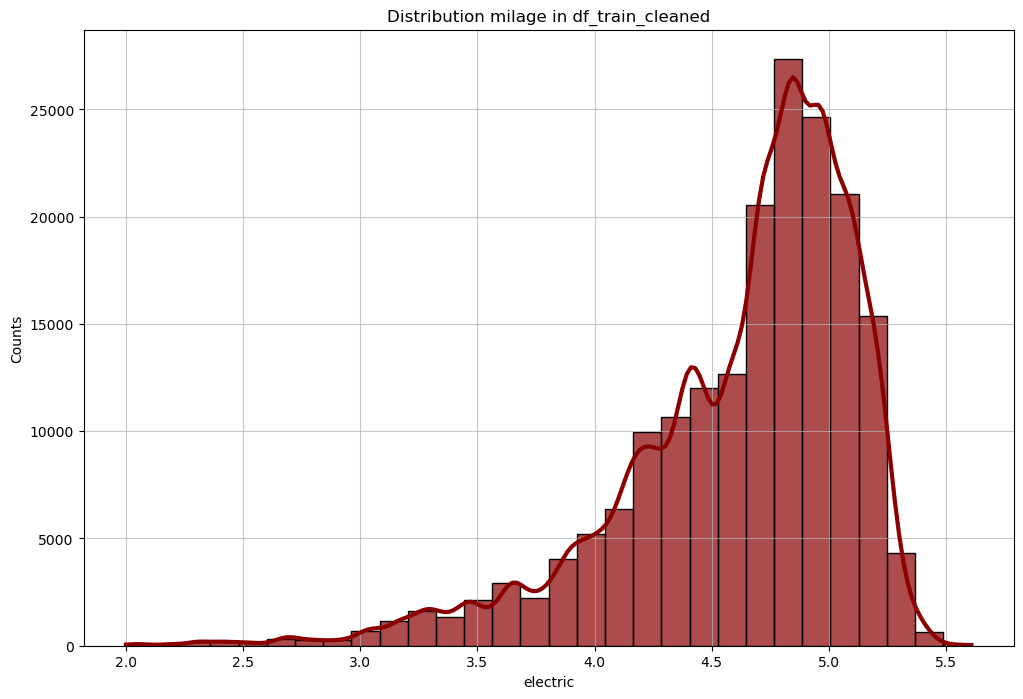

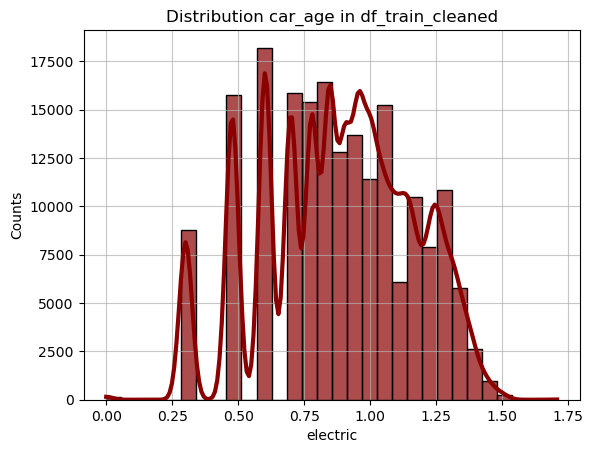

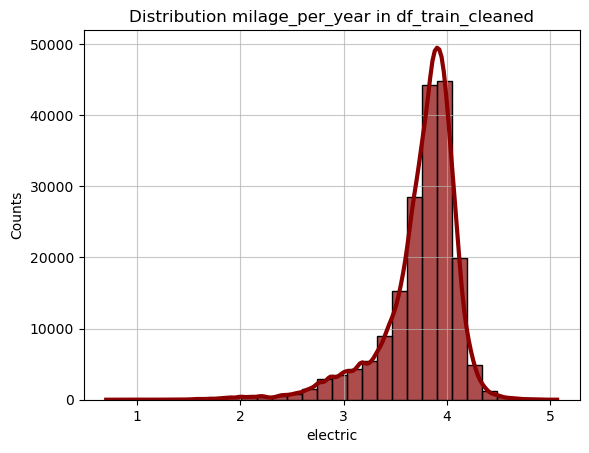

/home/midabrow/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


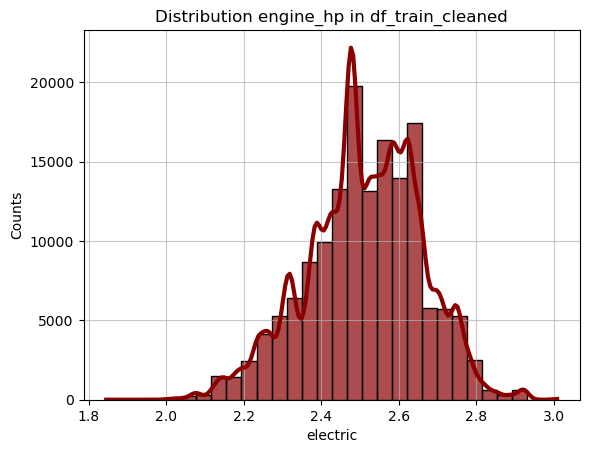

/home/midabrow/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


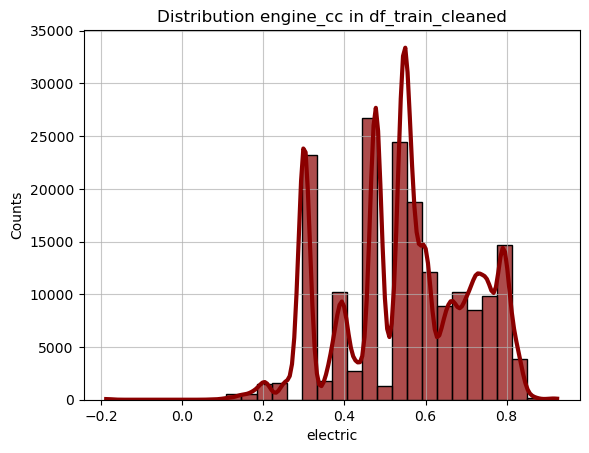

/home/midabrow/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


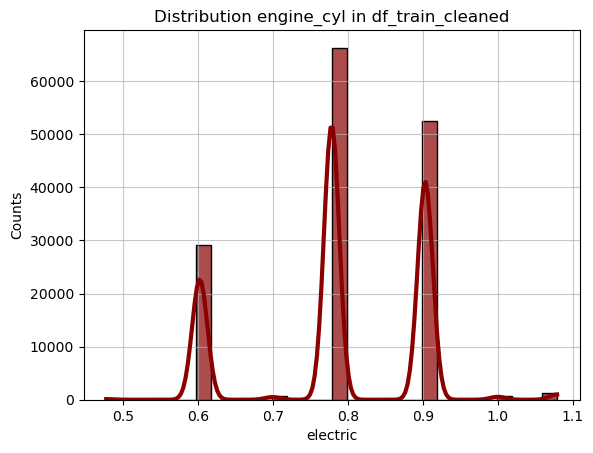

In [420]:
plot_numeric_distribution(df_train_without_price, 'df_train_cleaned')

#### TARGET 

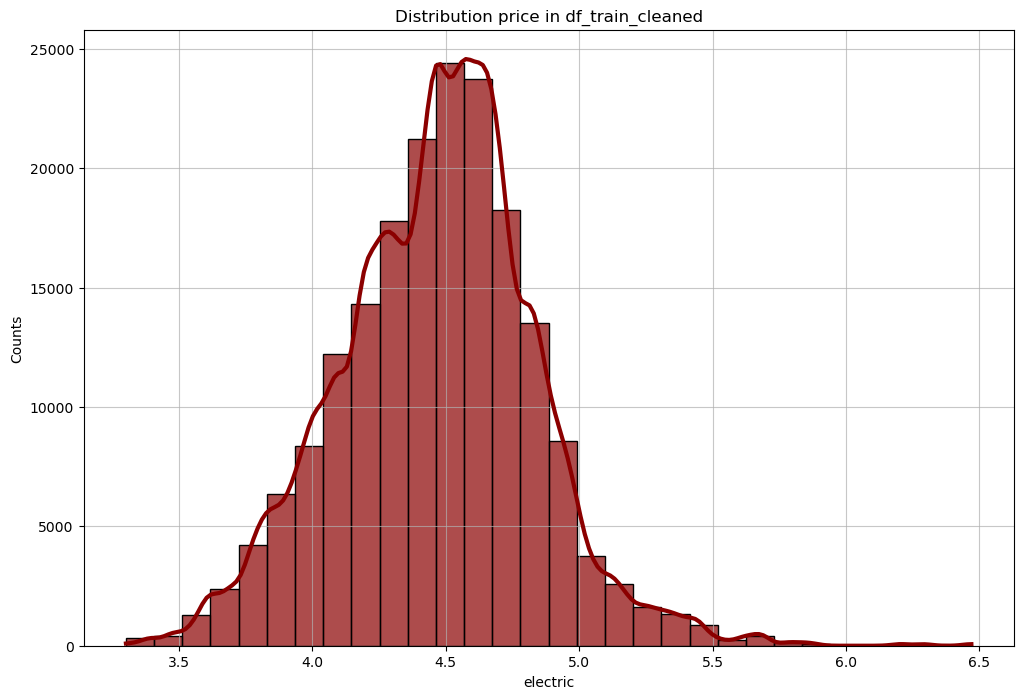

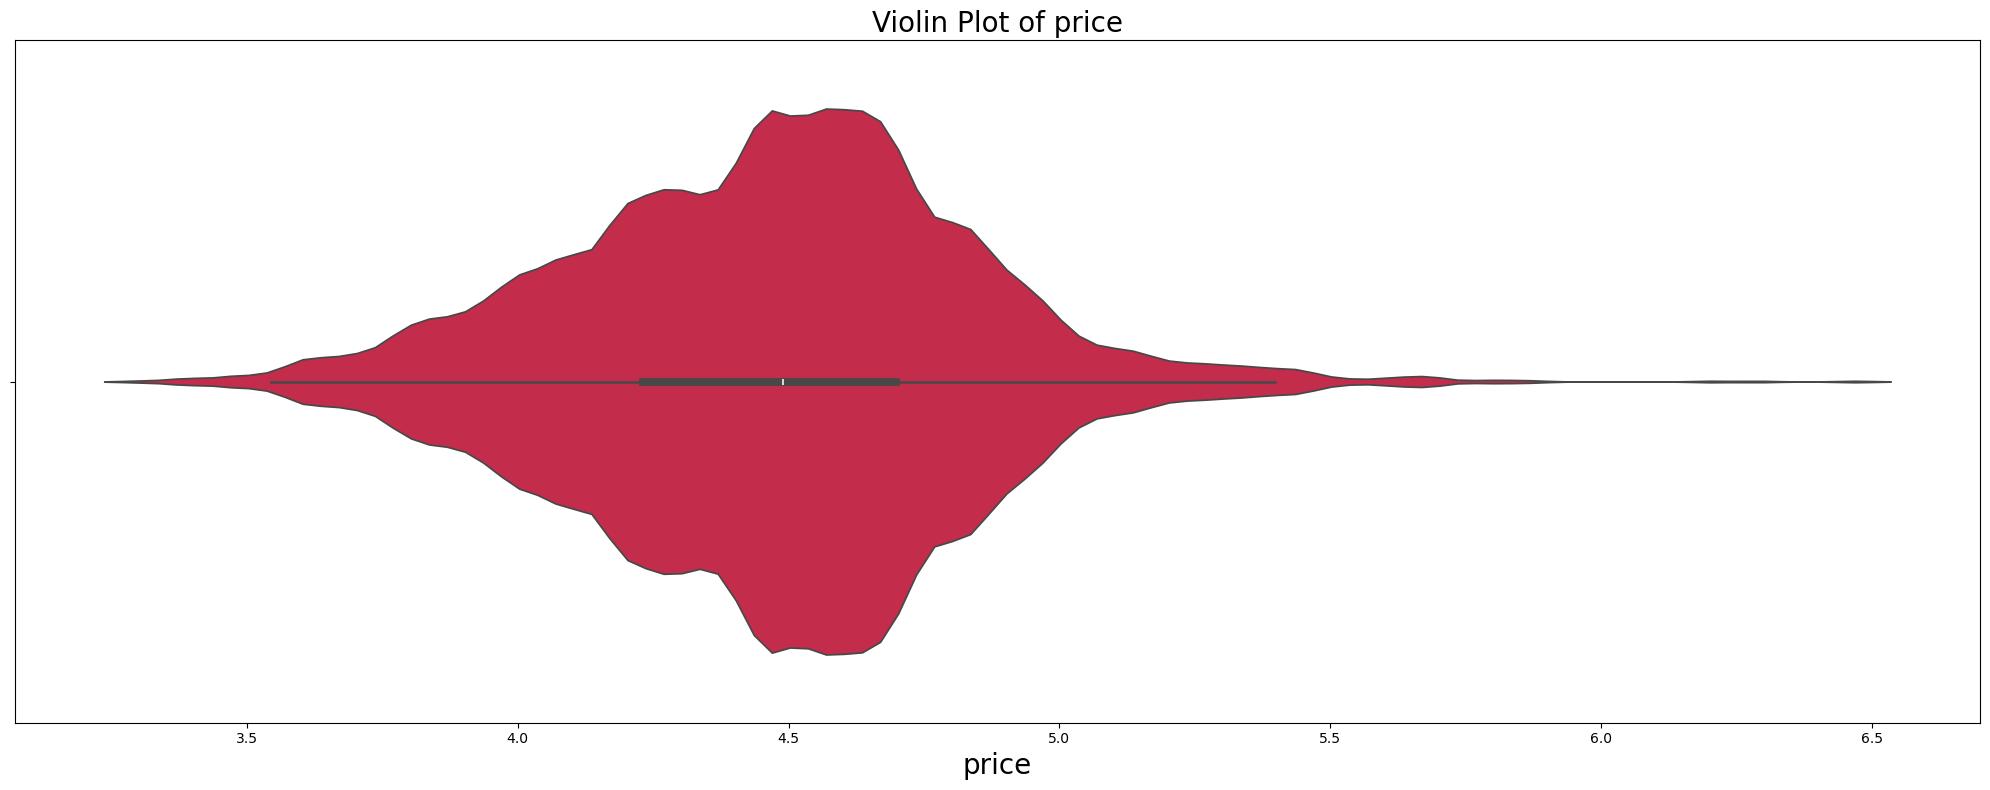

In [421]:
plot_numeric_distribution(df=df_train_cleaned, dataset_name='df_train_cleaned', one_column=True, target_column='price')
plot_outlier_detection(df_train_cleaned, 'price')

#### DF_TEST

In [422]:
# drop ID column 
df_test_cleaned.drop(columns=['id'], inplace=True)

In [423]:
numeric_distribution(df_test_cleaned)

,count,mean,min,25%,50%,75%,max,std
model_year,125690,2015-10-19 10:10:56.586840576,1974-01-01 00:00:00,2013-01-01 00:00:00,2017-01-01 00:00:00,2020-01-01 00:00:00,2024-01-01 00:00:00,NaN
milage,125690.0,66042.58151,100.0,24500.0,57500.0,95798.0,405000.0,50223.858435
car_age,125690.0,9.202474,1.0,5.0,8.0,12.0,51.0,5.673797
milage_per_year,125690.0,7226.445518,2.25,4291.67,6850.9,9450.0,99875.0,4640.485231
engine_hp,125690.0,282.795179,0.0,201.0,300.0,395.0,1020.0,167.09626
engine_cc,125690.0,3.642385,0.0,2.7,3.5,4.7,8.4,1.500268
engine_cyl,125690.0,5.100398,0.0,4.0,6.0,8.0,12.0,2.904468


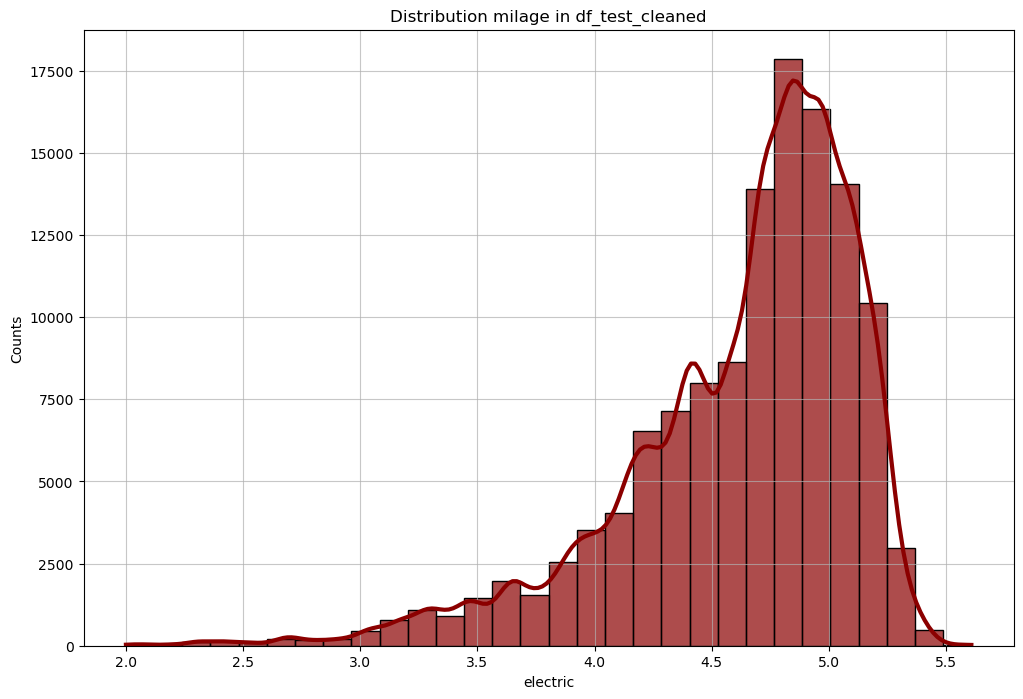

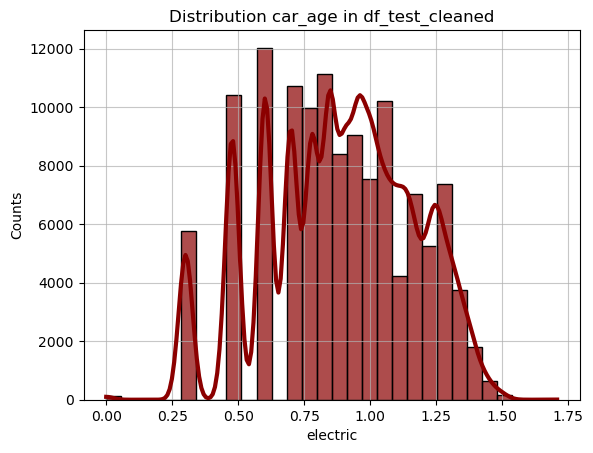

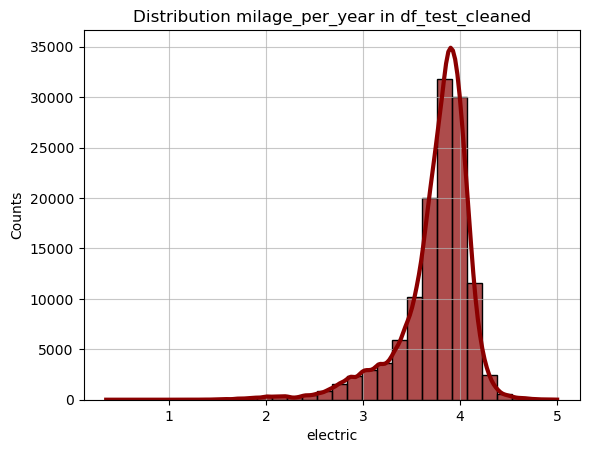

/home/midabrow/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


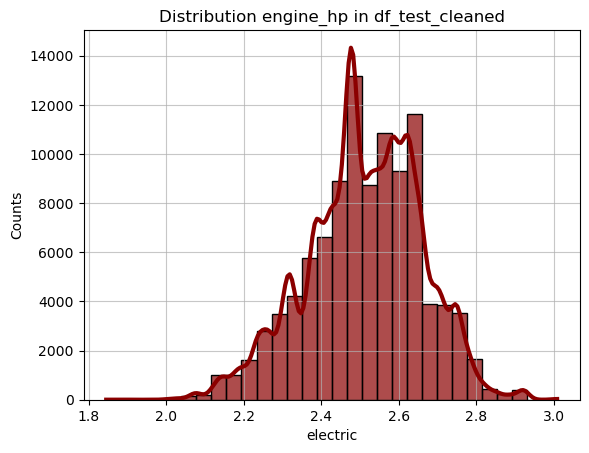

/home/midabrow/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


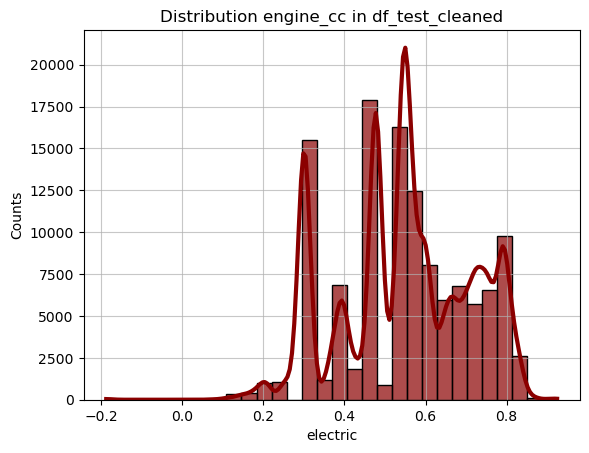

/home/midabrow/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


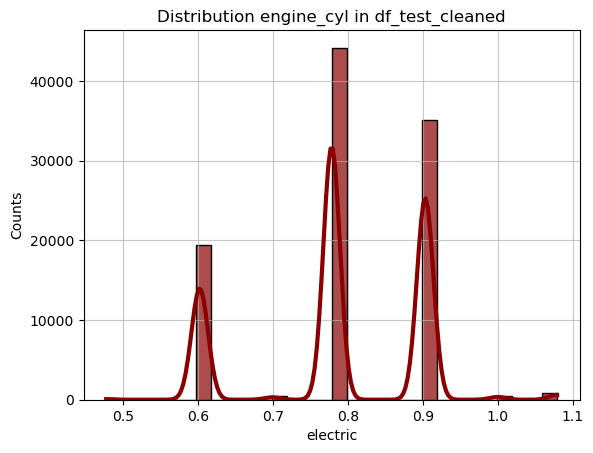

In [424]:
plot_numeric_distribution(df_test_cleaned, 'df_test_cleaned')

### Categorical 

In [425]:
def categorical_distribution(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    return {col: df[col].value_counts() for col in categorical_cols}


def plot_categorical_distribution(df, dataset_name, top_n=20):
    categorical_cols = df.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        # Pobierz N najczęstszych wartości
        top_values = df[col].value_counts().nlargest(top_n)

        plt.figure(figsize=(10,5))
        sns.countplot(y=df[col], order=top_values.index, hue=df[col], palette="coolwarm")
        plt.title(f"Distribution {col} in {dataset_name}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.xticks(rotation=90)

# LUB
# def plot_categorical_with_other(df, column, dataset_name, threshold=500):
#     counts = df[column].value_counts()
#     df[column] = df[column].apply(lambda x: x if counts[x] > threshold else "Inne")

#     plt.figure(figsize=(12, 6))
#     sns.countplot(y=df[column], order=df[column].value_counts().index, palette="coolwarm")
    
#     plt.title(f"Rozkład {column} w {dataset_name} (rzadkie = 'Inne')")
#     plt.xlabel("Liczność")
#     plt.ylabel(column)
    
#     plt.show()

# plot_categorical_with_other(df_train, "ext_col", "df_train", threshold=500)

In [426]:
def generate_colors(n_colors):
    return sns.color_palette("flare", n_colors=n_colors)

def plot_cat_distribution(df, cat_features):

    for column in cat_features:
      
        f, ax = plt.subplots(1, 2, figsize=(20, 8))

        unique_values_count = df[column].nunique()
        colors = generate_colors(unique_values_count)

        df[column].value_counts().plot.pie(
            autopct='%1.1f%%', 
            ax=ax[0], 
            shadow=True, 
            colors=colors
        )
        ax[0].set_ylabel('')
        ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=14)
        
        sns.countplot(
            x=column, 
            data=df, 
            ax=ax[1], 
            palette=colors)
        ax[1].set_xlabel('')
        ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)
        
        plt.suptitle(f'Distribution of {column}', fontsize=20)
        plt.show()

In [427]:
categorical_columns = df_train_without_price.select_dtypes(include='object')
categorical_columns.columns.to_list()

['brand',
 'model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title']

In [428]:
bool_columns = ['engine_turbo', 'engine_flexfuel', 'engine_hybrid', 'electric']
df_train_without_price[bool_columns] = df_train_without_price[bool_columns].astype(str)

categorical_columns = df_train_without_price.select_dtypes(include='object')
categorical_columns.columns.to_list()

['brand',
 'model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title',
 'engine_turbo',
 'engine_flexfuel',
 'engine_hybrid',
 'electric']

In [429]:
cat_features_eda =  ['accident', 'clean_title', 'fuel_type', 'engine_turbo', 'engine_flexfuel', 'engine_hybrid', 'electric']

#### DF_TRAIN

In [430]:
categorical_distribution(df_train_without_price)

{'brand': brand
 Ford             23088
 Mercedes-benz    19172
 BMW              17028
 Chevrolet        16335
 Audi             10887
 Porsche          10612
 Land              9525
 Toyota            8850
 Lexus             8643
 Jeep              6474
 Cadillac          4674
 RAM               4249
 Nissan            3930
 Tesla             3738
 Infiniti          3276
 GMC               3215
 Dodge             3133
 Mazda             2719
 Kia               2497
 Lincoln           2423
 Subaru            2381
 Acura             2282
 Honda             2101
 Hyundai           2045
 Volkswagen        1765
 Jaguar            1319
 Bentley           1155
 MINI              1064
 Genesis            969
 Buick              940
 Maserati           939
 Lamborghini        809
 Chrysler           727
 Volvo              723
 Alfa               682
 Rivian             590
 Rolls-royce        561
 Mitsubishi         551
 Pontiac            538
 Hummer             520
 Ferrari            359


In [431]:
# plot_categorical_distribution(df_train, 'df_train')

/tmp/ipykernel_28928/151924201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_28928/151924201.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)


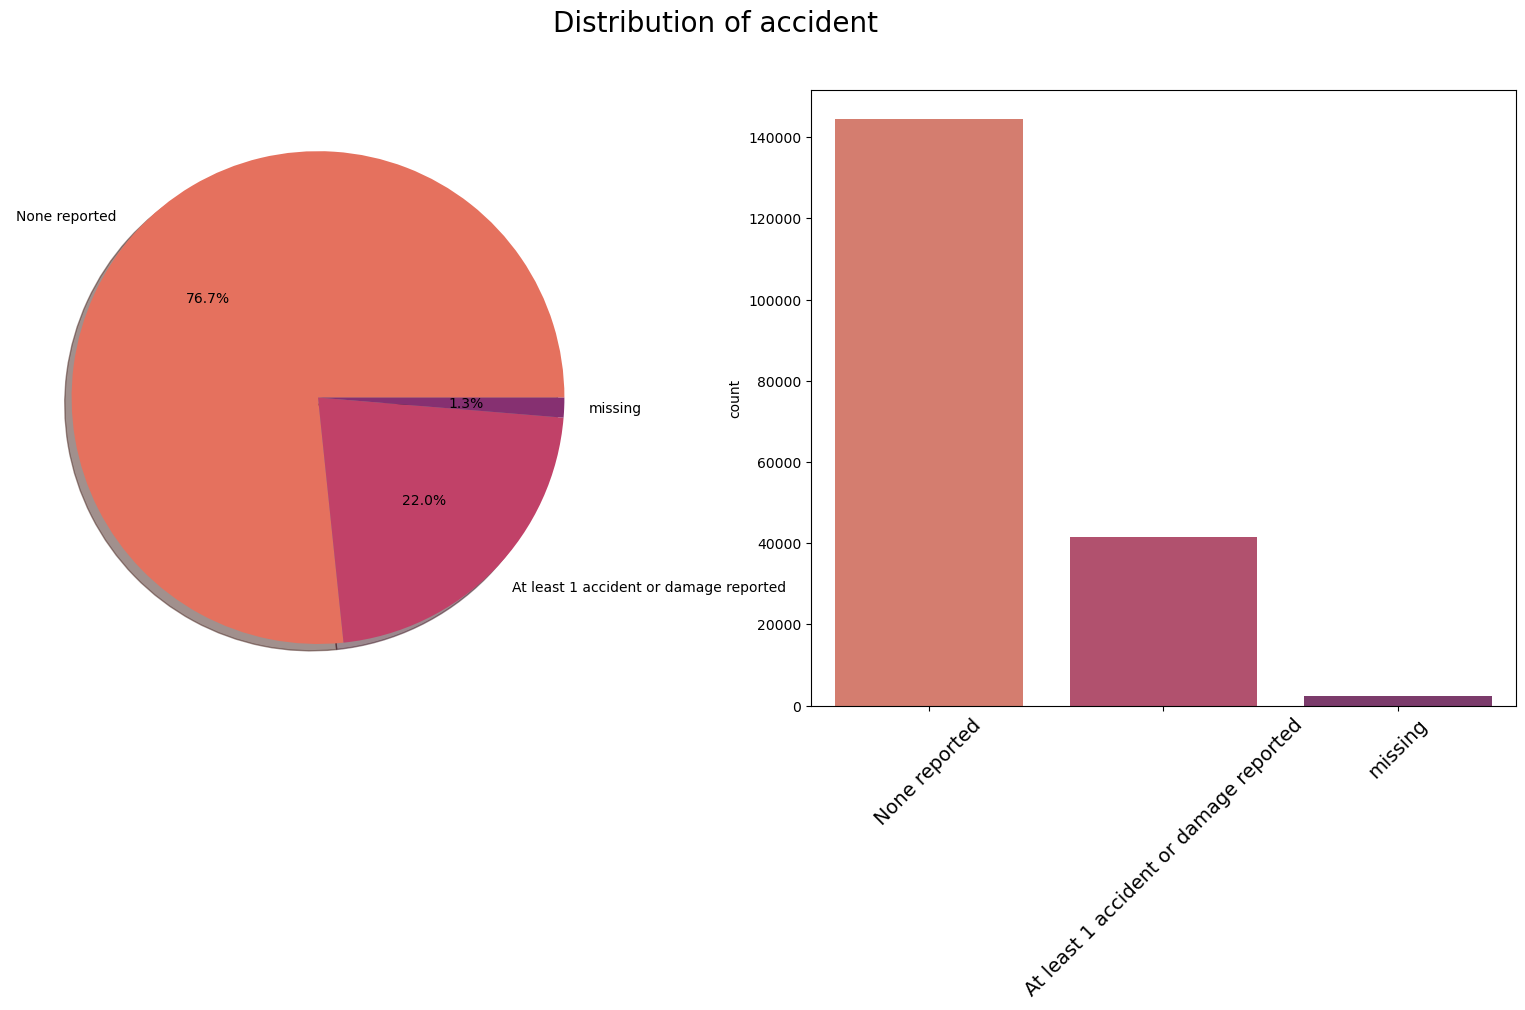

/tmp/ipykernel_28928/151924201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_28928/151924201.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)


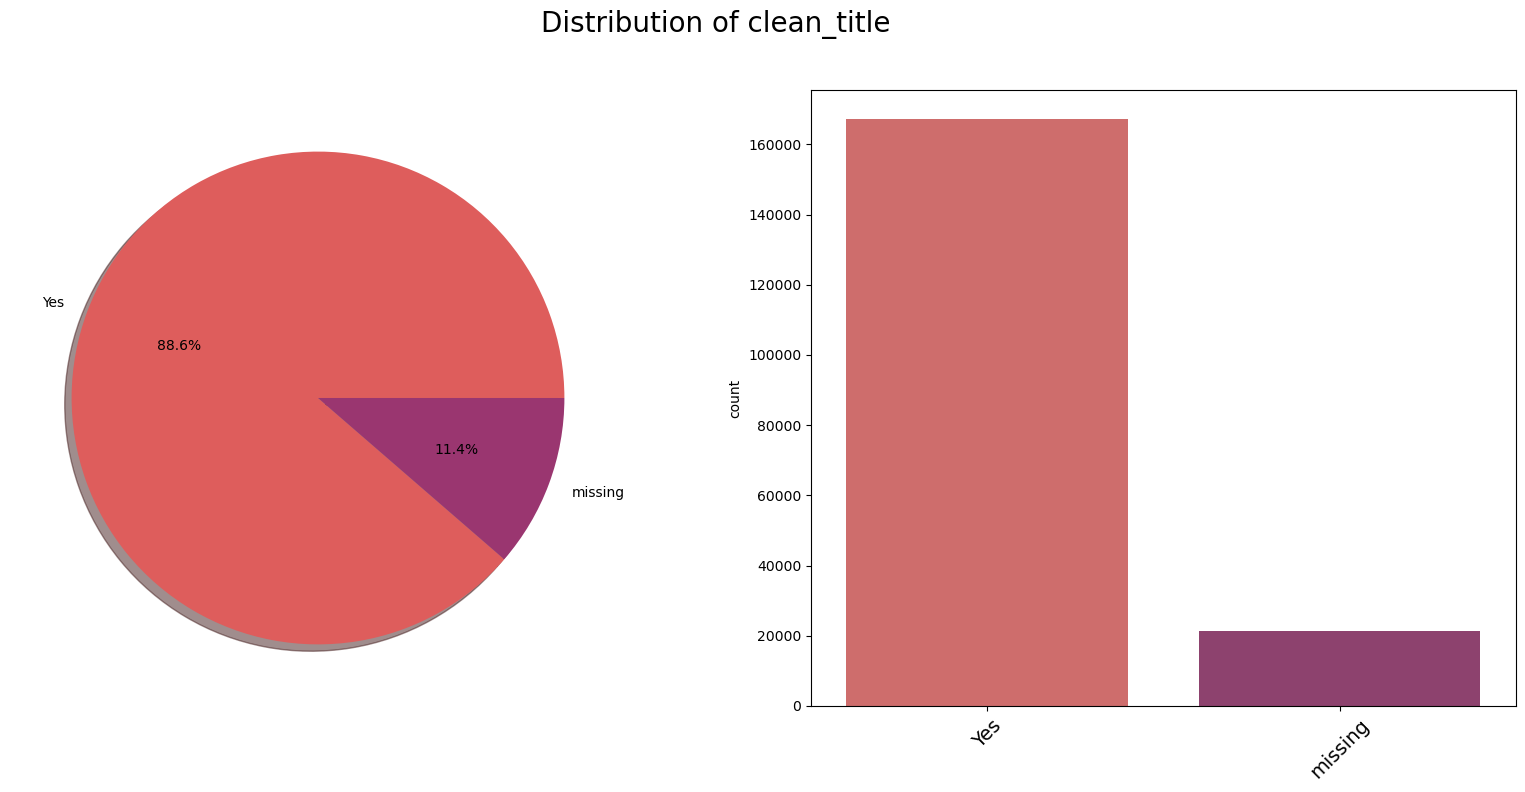

/tmp/ipykernel_28928/151924201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_28928/151924201.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)


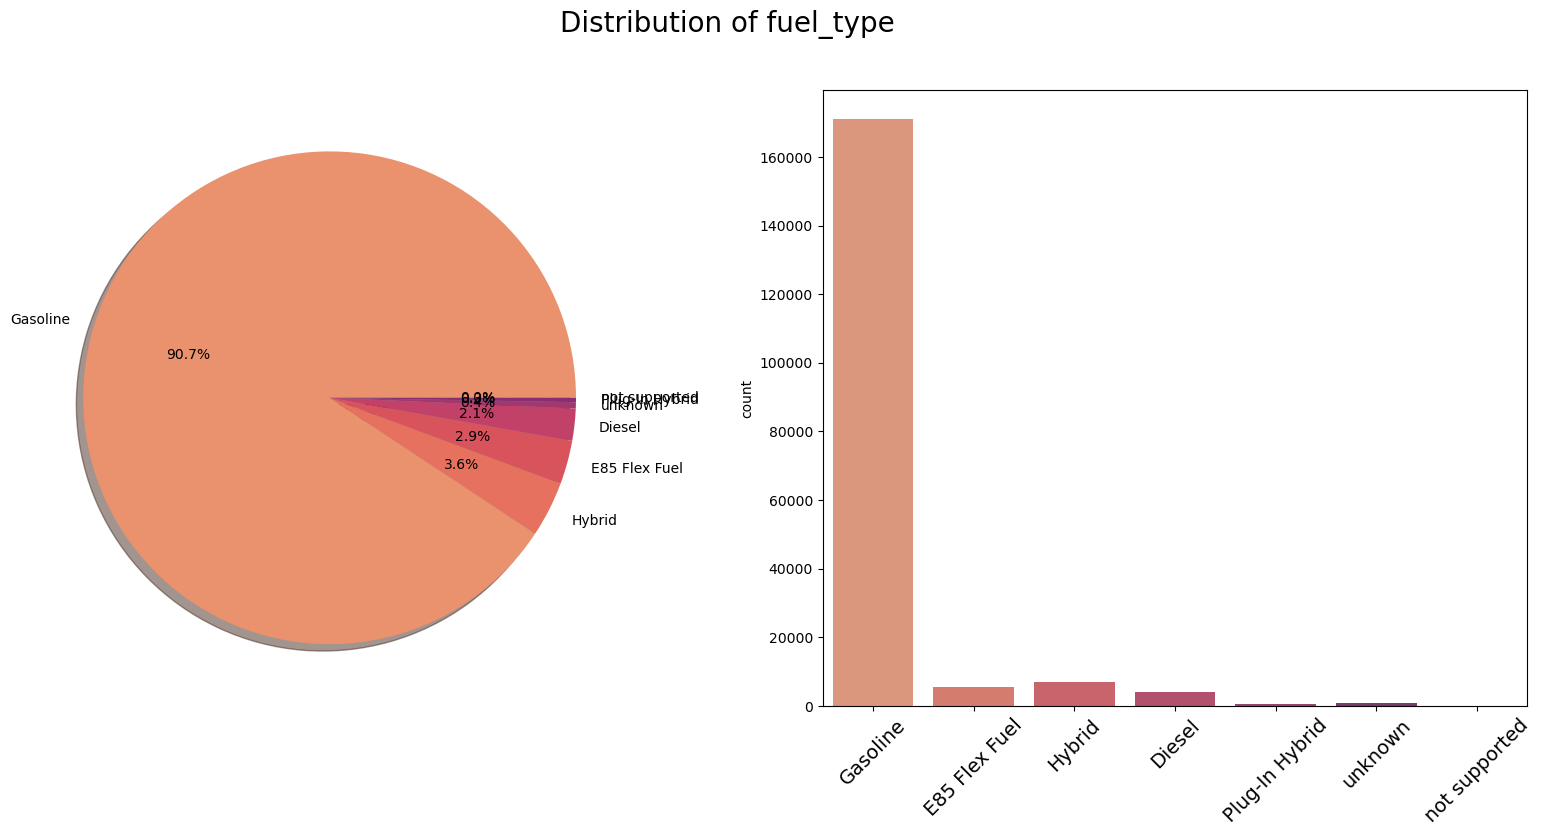

/tmp/ipykernel_28928/151924201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_28928/151924201.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)


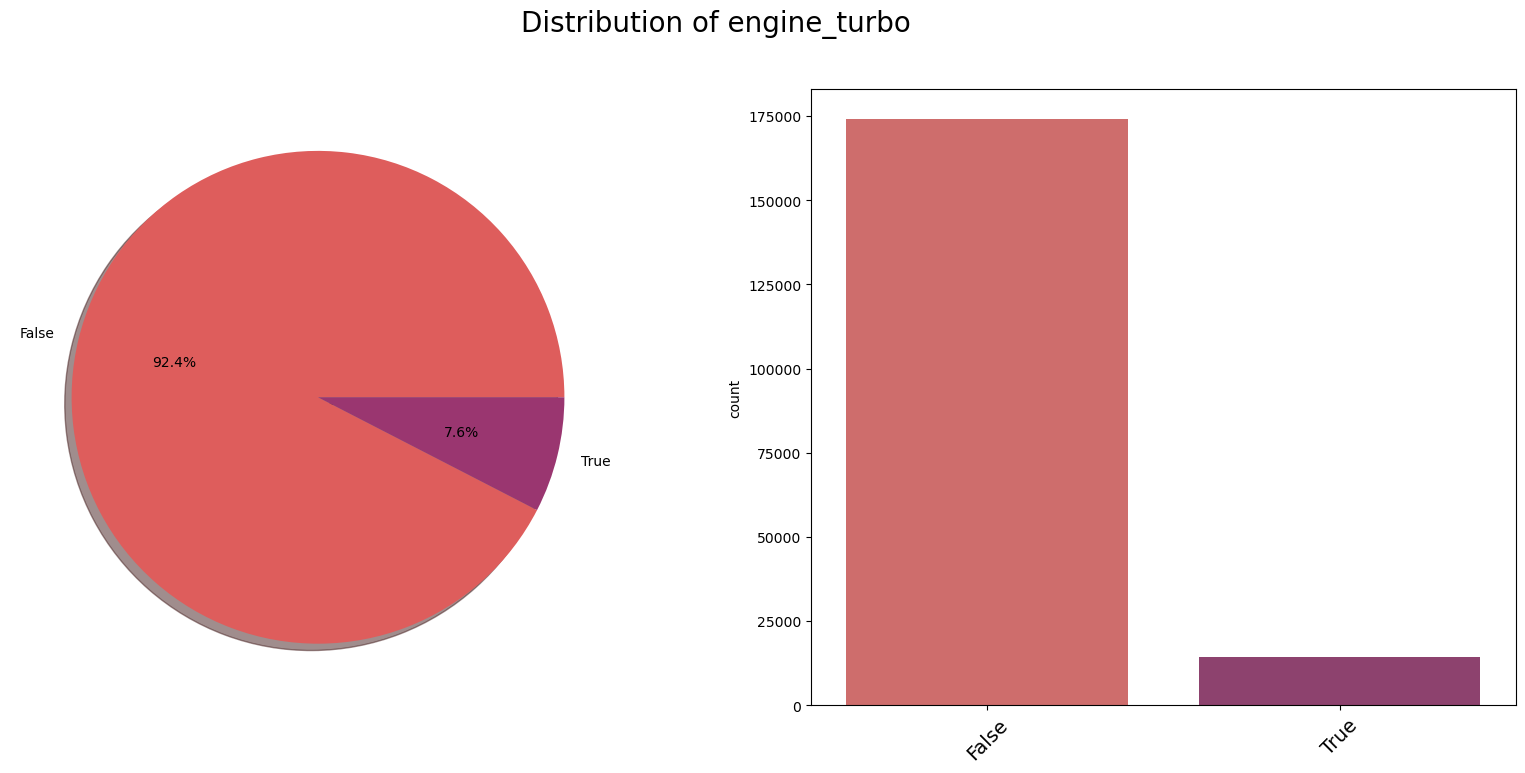

/tmp/ipykernel_28928/151924201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_28928/151924201.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)


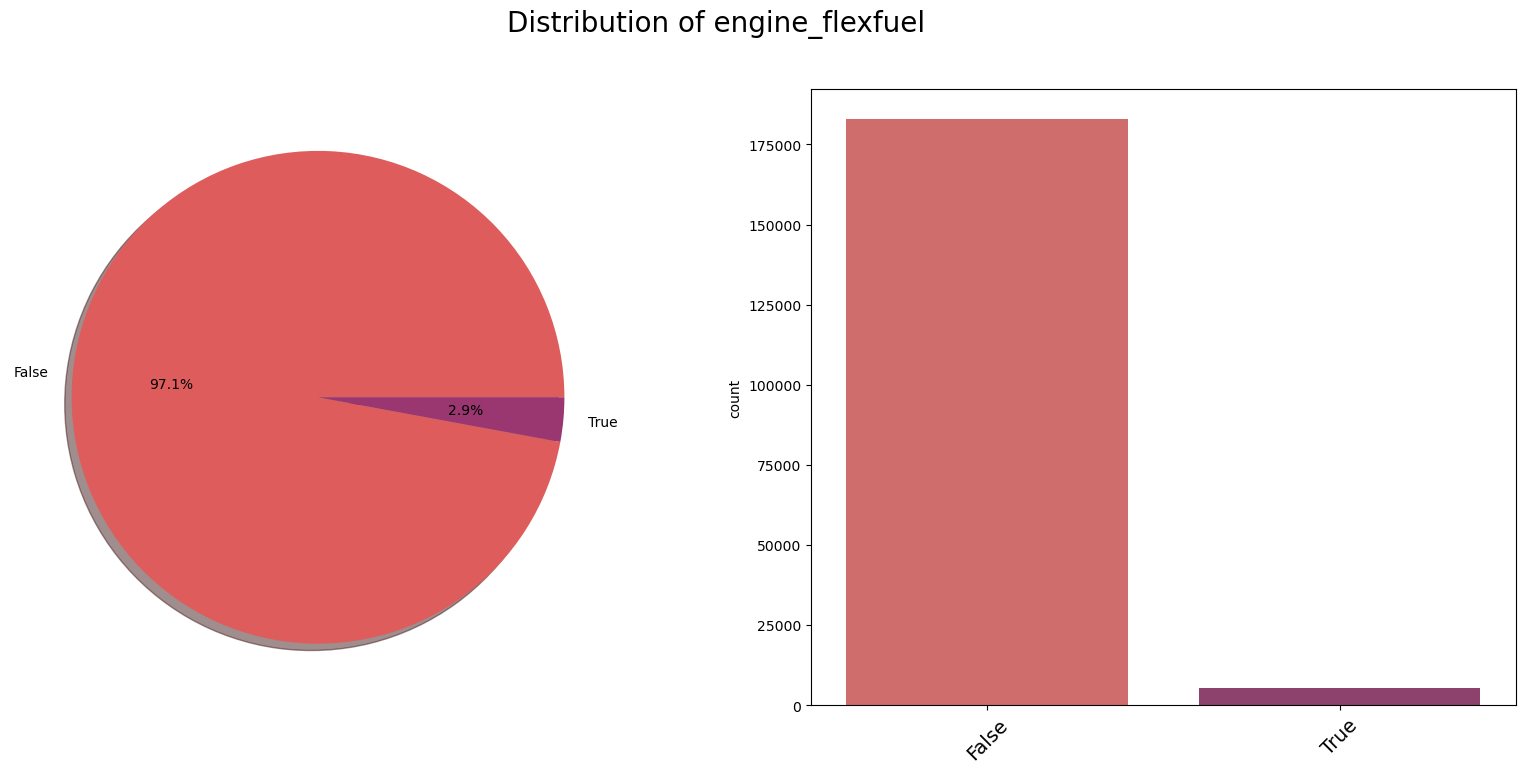

/tmp/ipykernel_28928/151924201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_28928/151924201.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)


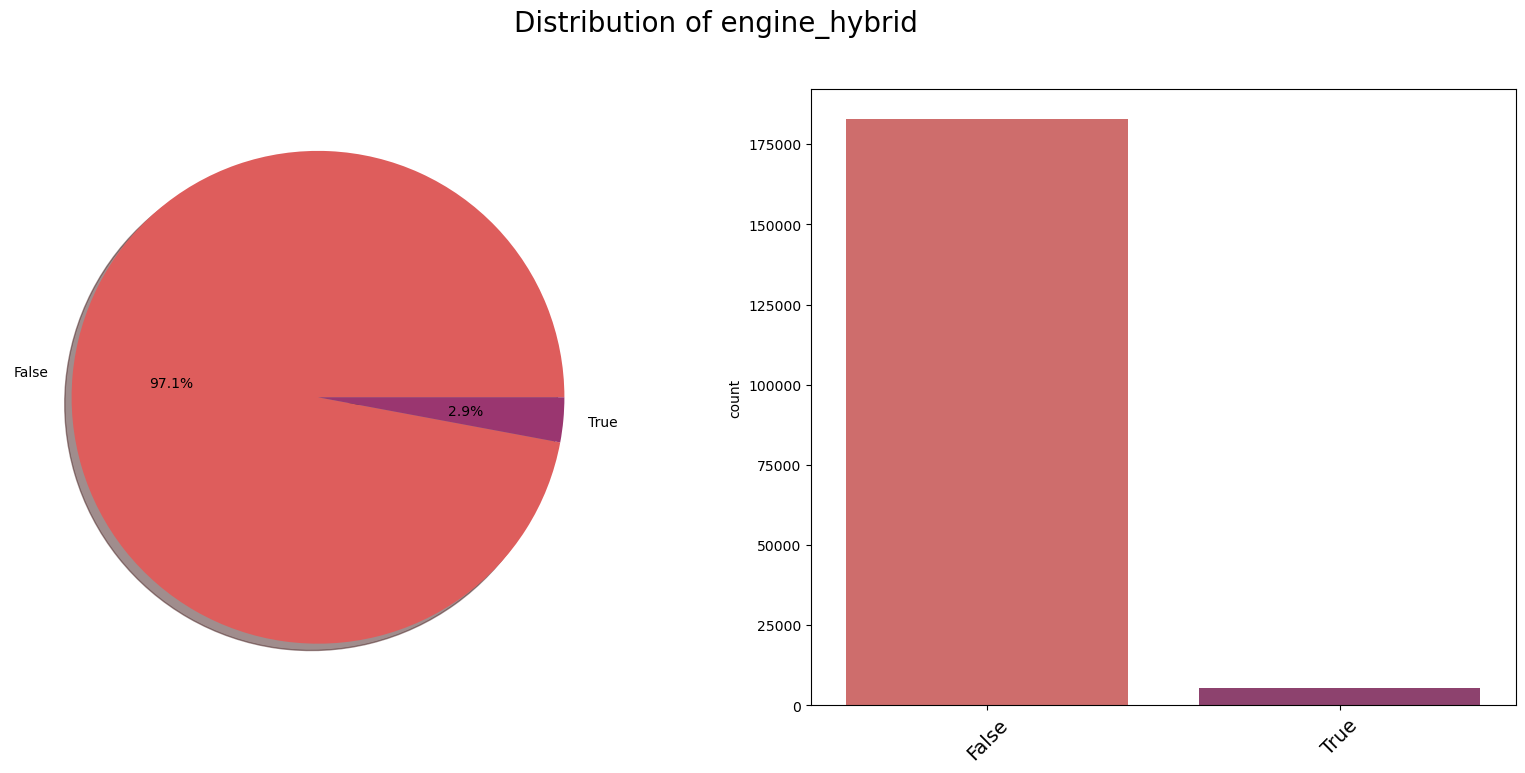

/tmp/ipykernel_28928/151924201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_28928/151924201.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)


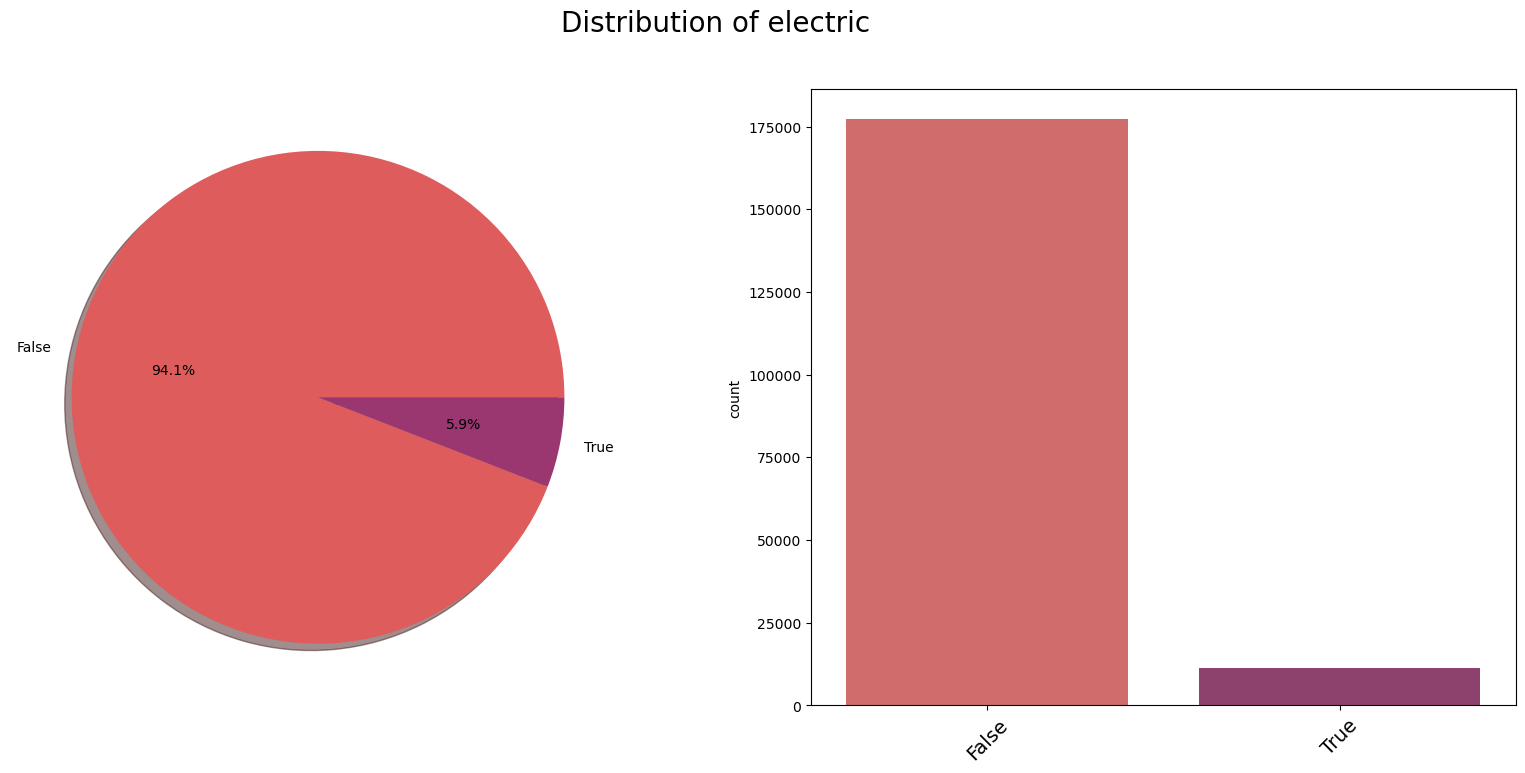

In [432]:
plot_cat_distribution(df_train_without_price, cat_features_eda)

#### DF_TEST

In [433]:
categorical_distribution(df_test_cleaned)

{'brand': brand
 Ford             15265
 Mercedes-benz    12875
 BMW              11286
 Chevrolet        10698
 Audi              7289
 Porsche           7153
 Land              6348
 Toyota            6084
 Lexus             5729
 Jeep              4412
 Cadillac          3059
 RAM               2753
 Nissan            2674
 Tesla             2387
 Infiniti          2123
 GMC               2094
 Dodge             2071
 Mazda             1770
 Kia               1750
 Lincoln           1593
 Subaru            1591
 Acura             1567
 Honda             1436
 Hyundai           1308
 Volkswagen        1222
 Jaguar             934
 Bentley            789
 MINI               697
 Buick              651
 Genesis            643
 Maserati           619
 Volvo              576
 Lamborghini        547
 Chrysler           514
 Alfa               467
 Rivian             390
 Rolls-royce        383
 Mitsubishi         367
 Hummer             342
 Pontiac            341
 Ferrari            251


/tmp/ipykernel_28928/151924201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_28928/151924201.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)


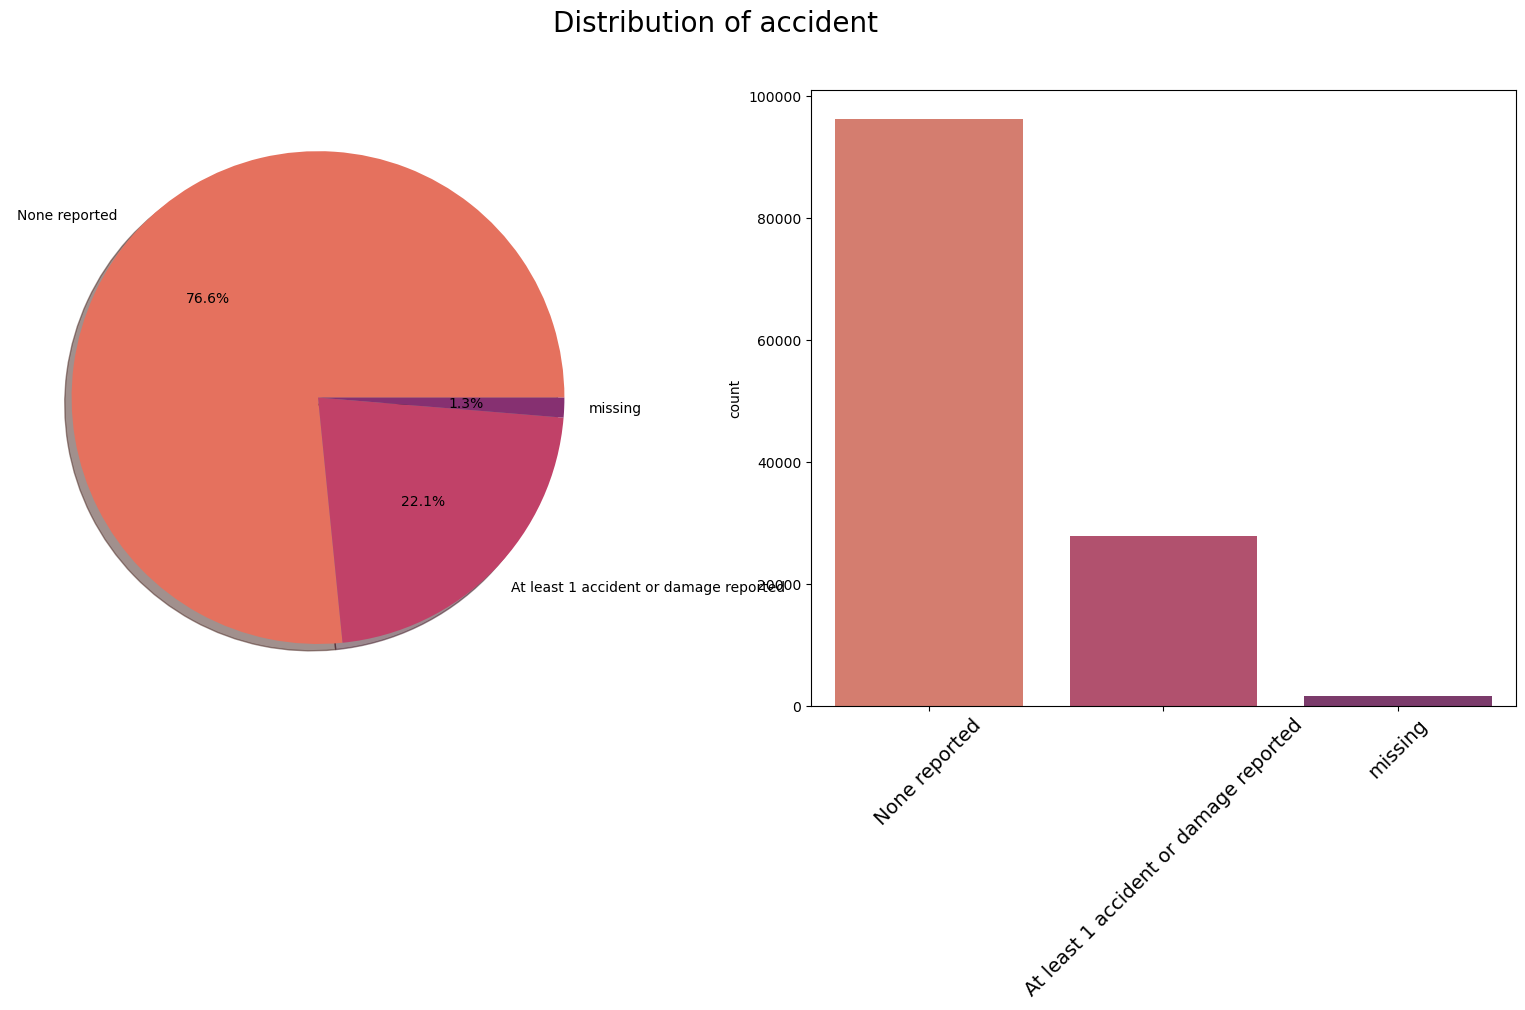

/tmp/ipykernel_28928/151924201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_28928/151924201.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)


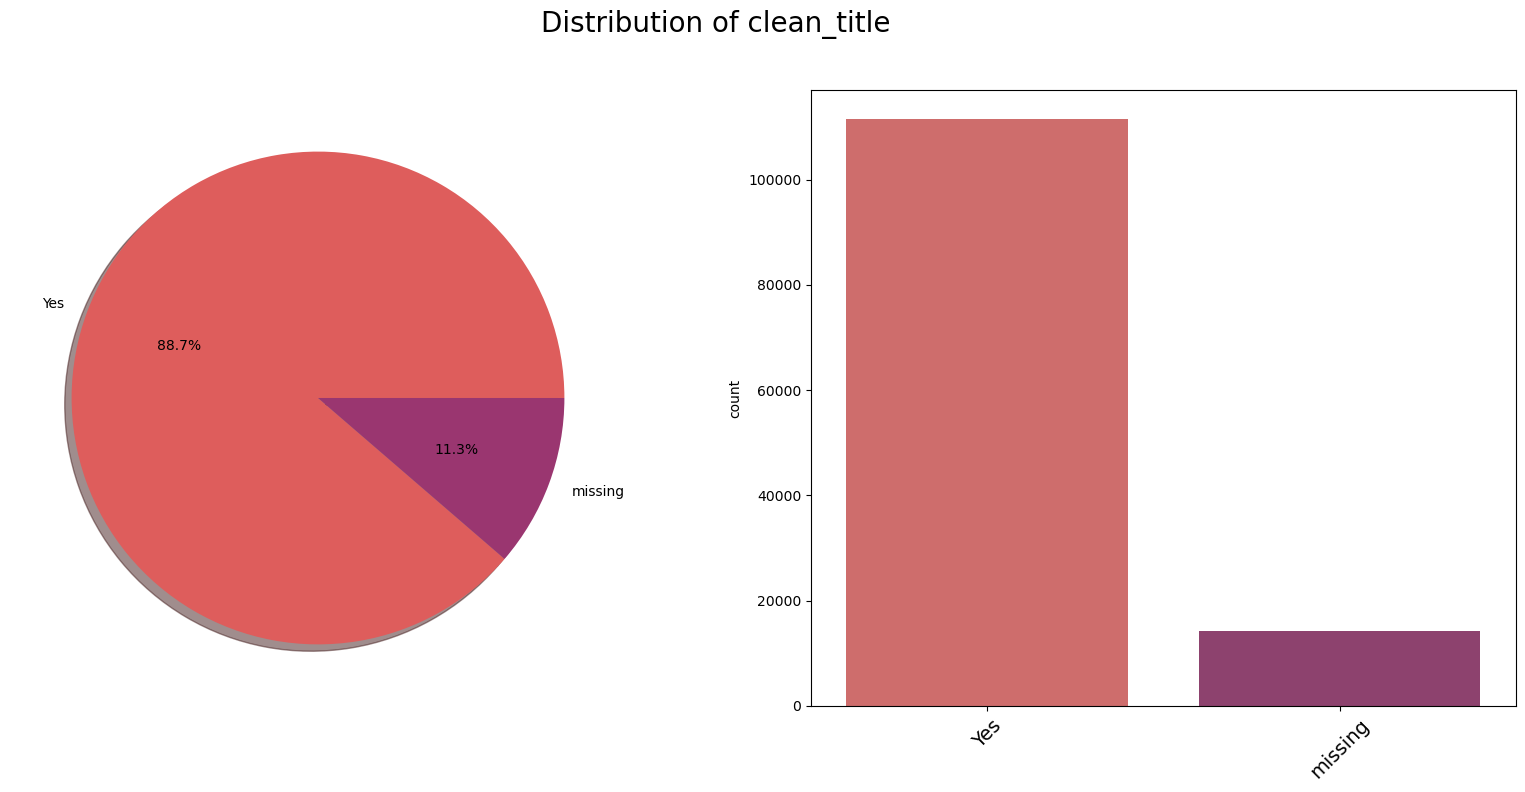

/tmp/ipykernel_28928/151924201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_28928/151924201.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)


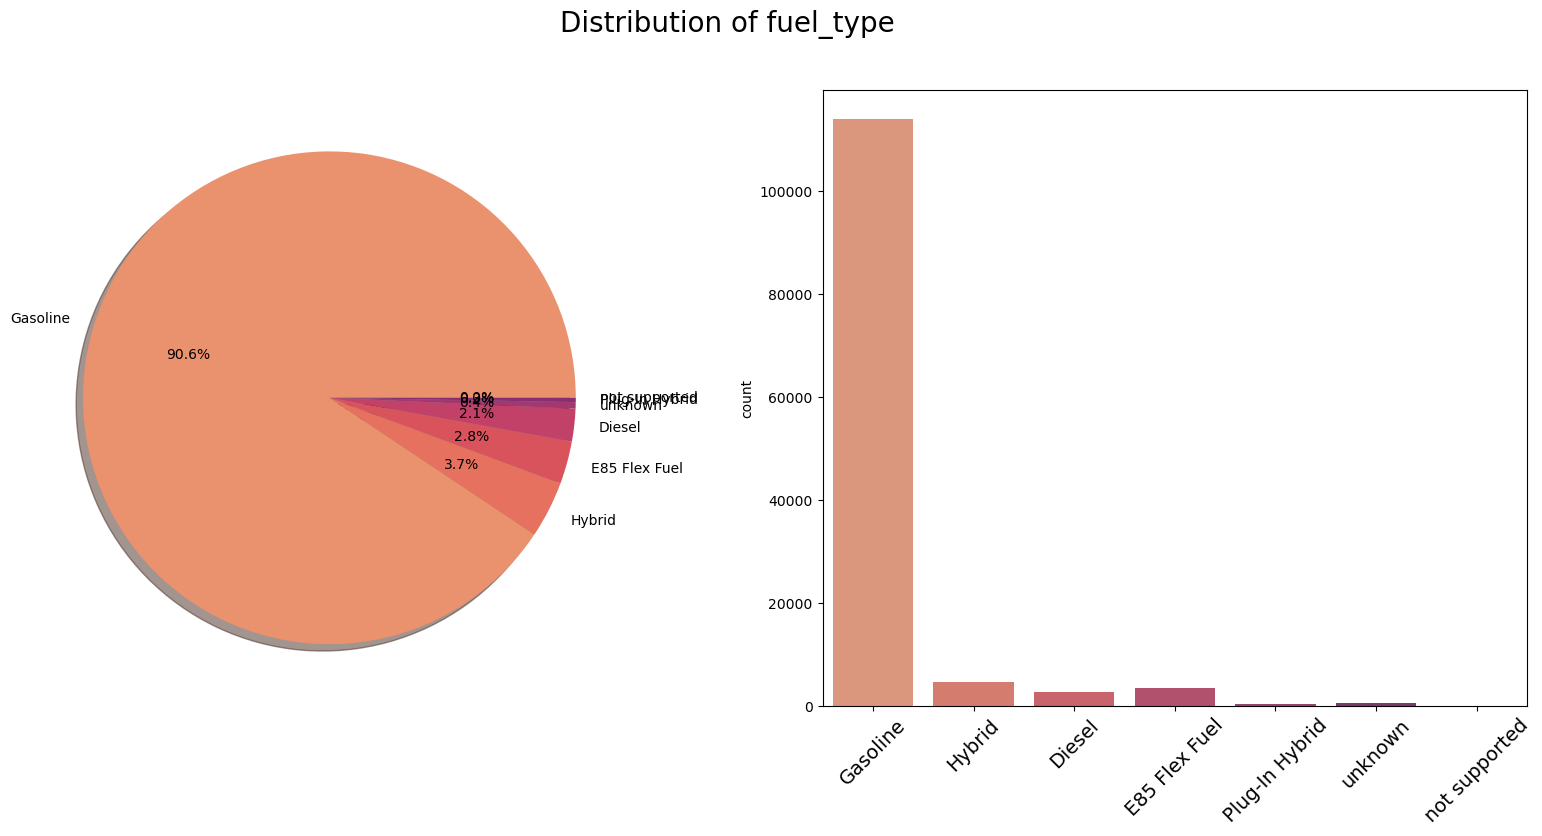

/tmp/ipykernel_28928/151924201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_28928/151924201.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)


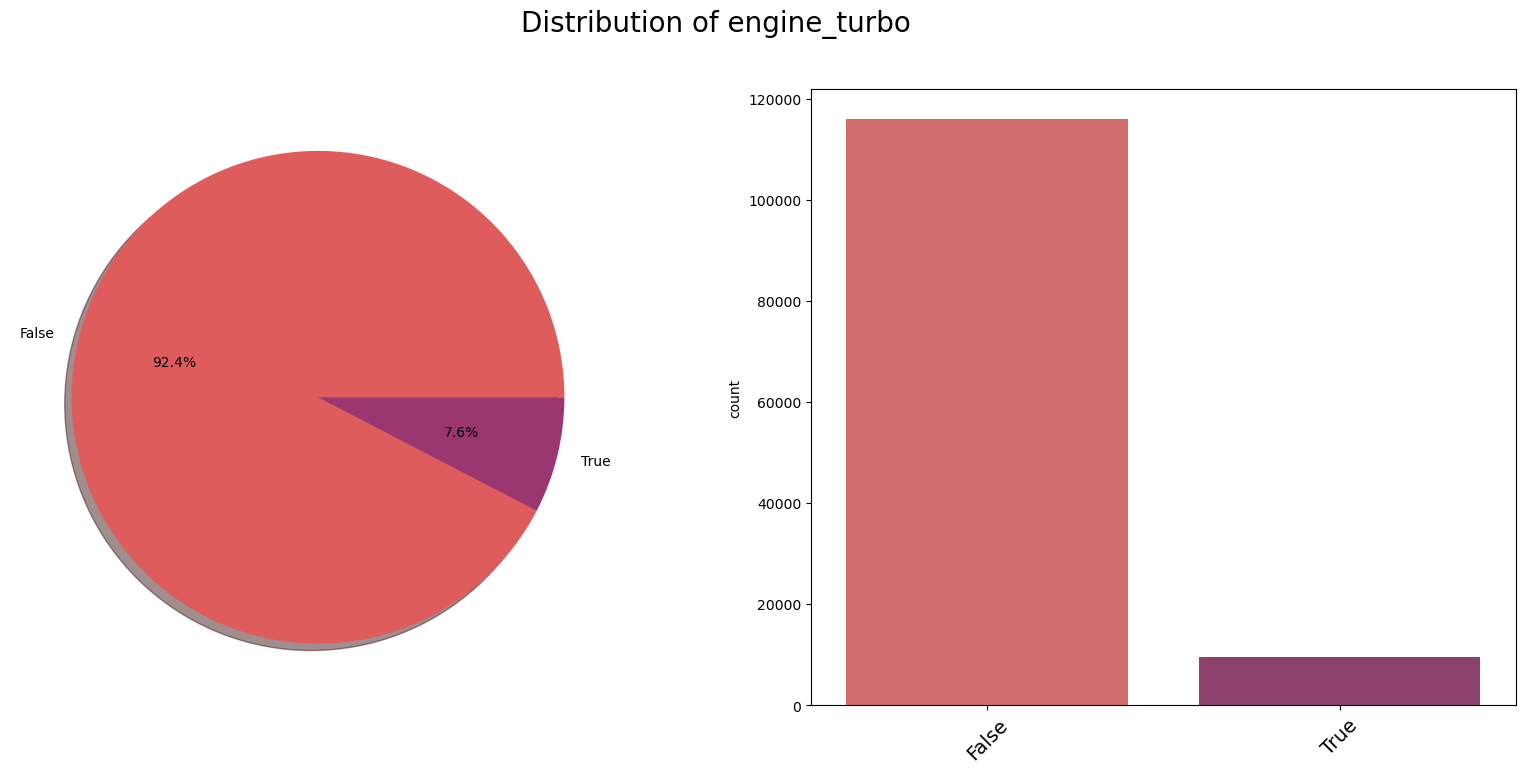

/tmp/ipykernel_28928/151924201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_28928/151924201.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)


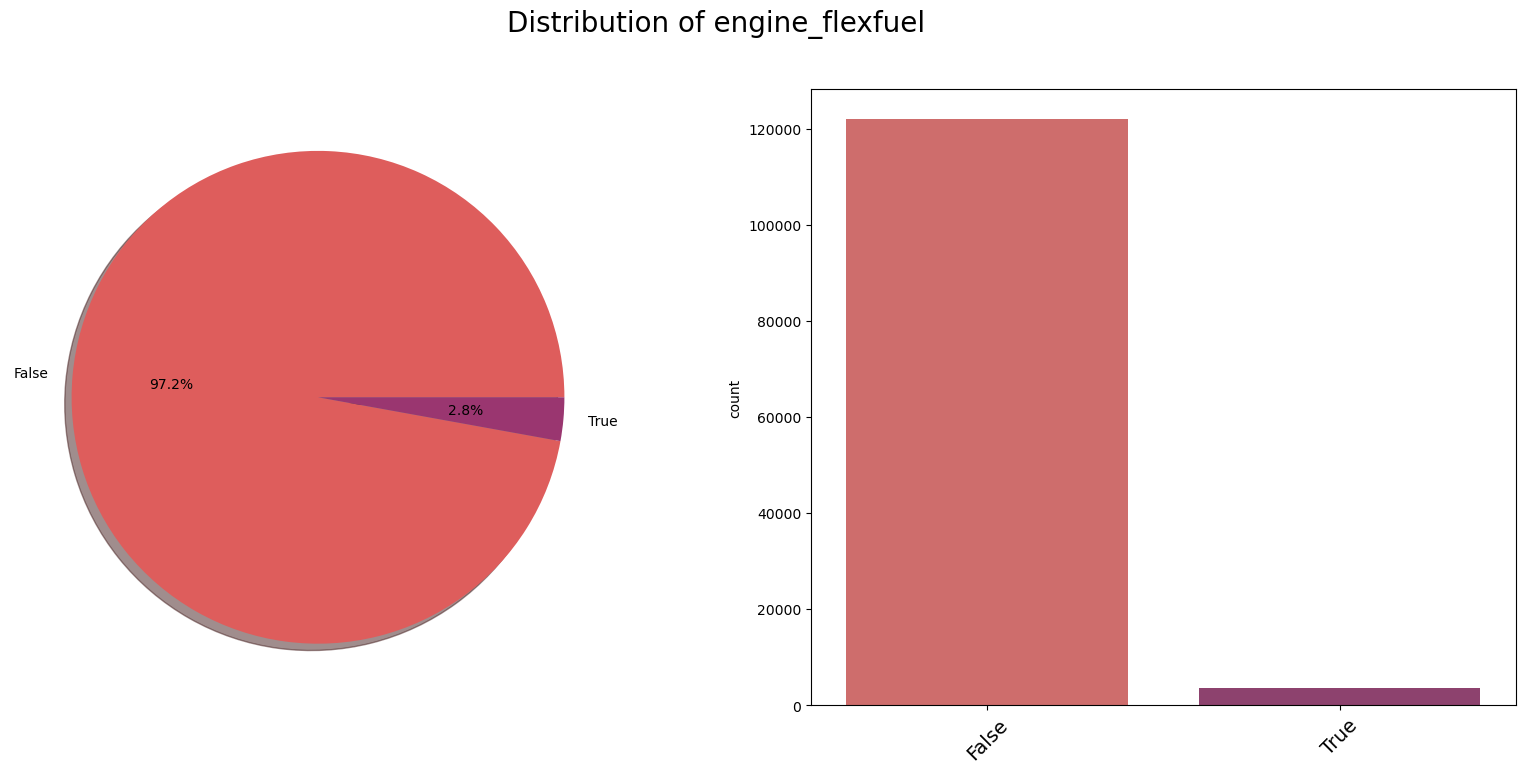

/tmp/ipykernel_28928/151924201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_28928/151924201.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)


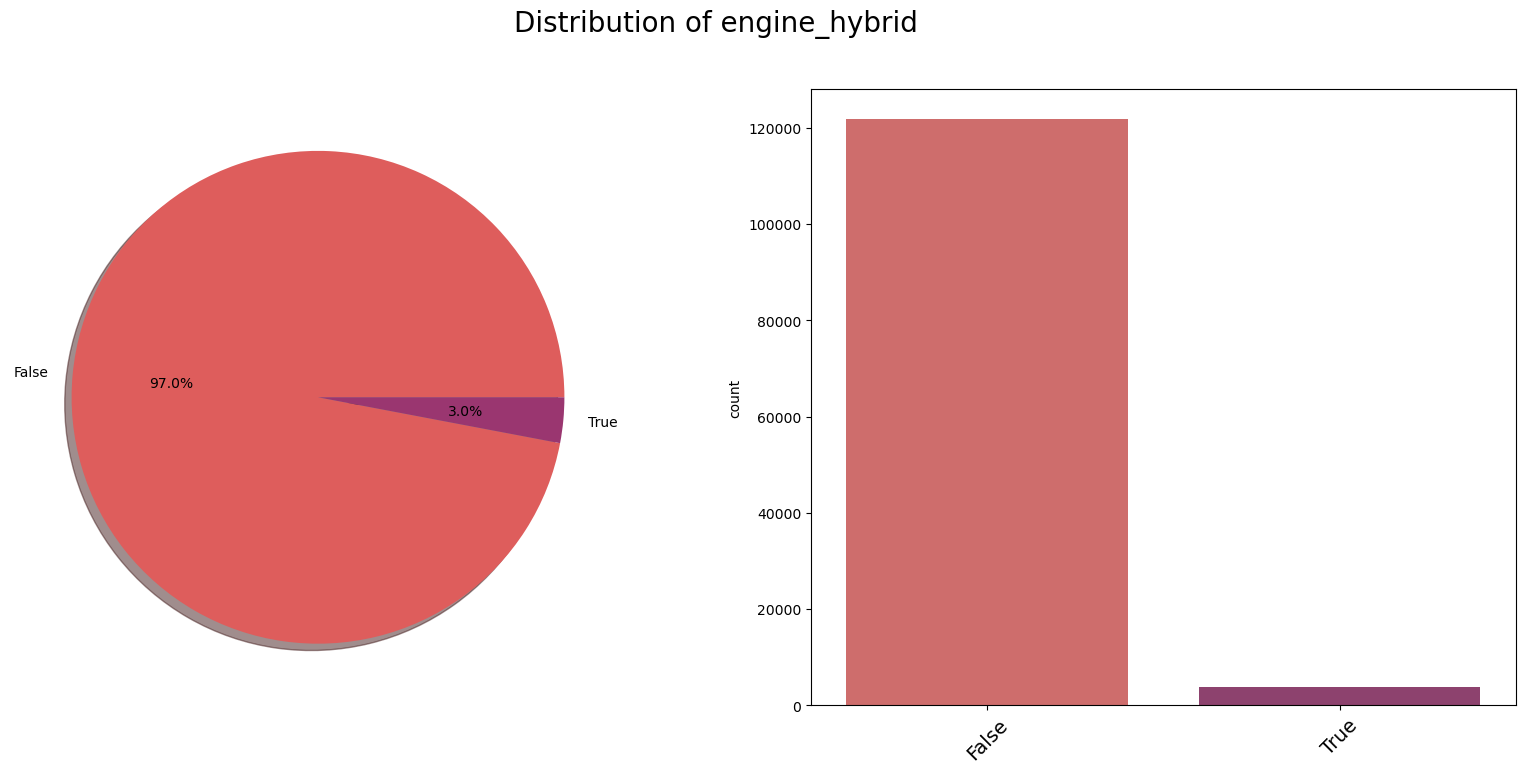

/tmp/ipykernel_28928/151924201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipykernel_28928/151924201.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, fontsize=14)


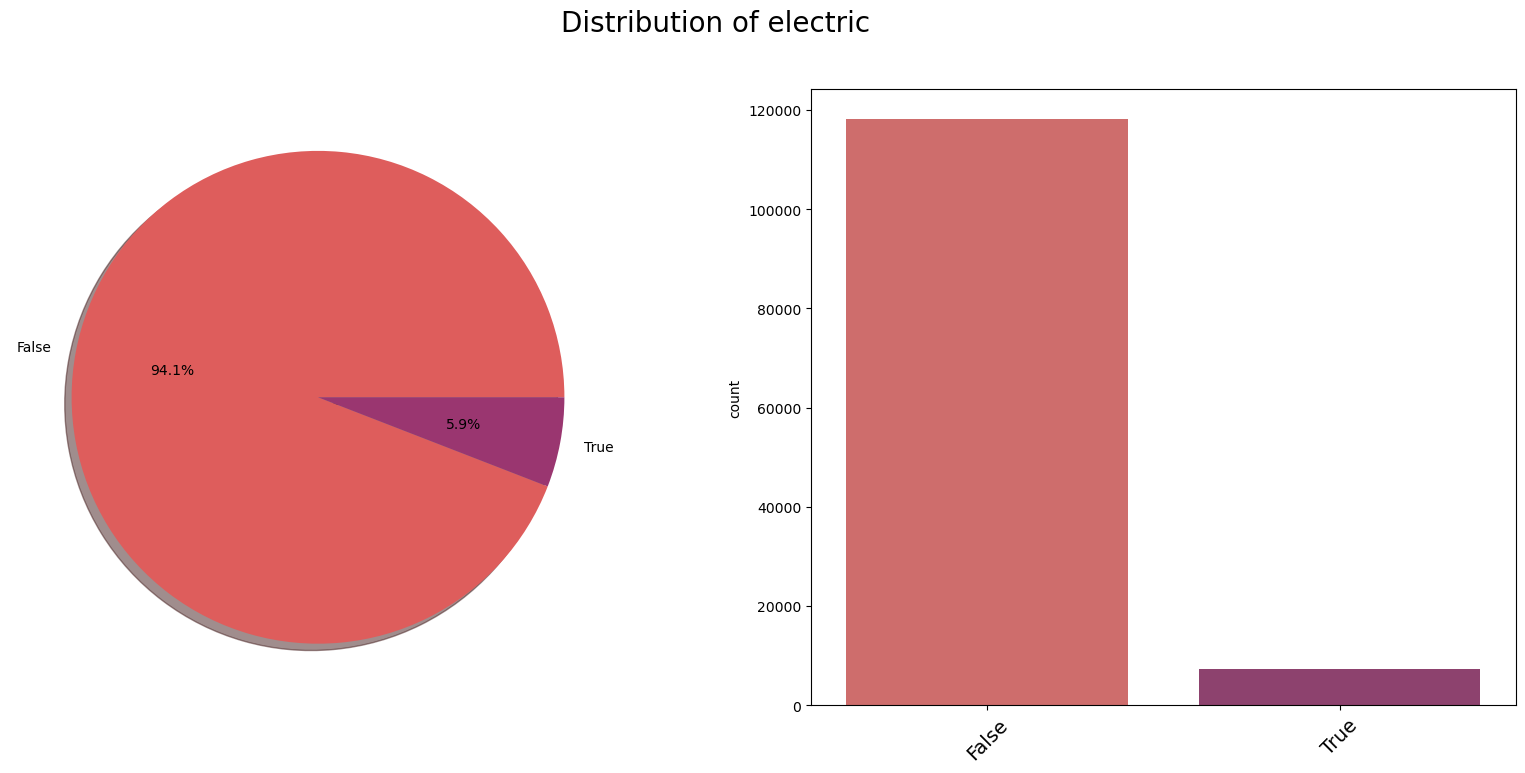

In [434]:
plot_cat_distribution(df_test_cleaned, cat_features_eda)

## 5.2 Correlation analysis 

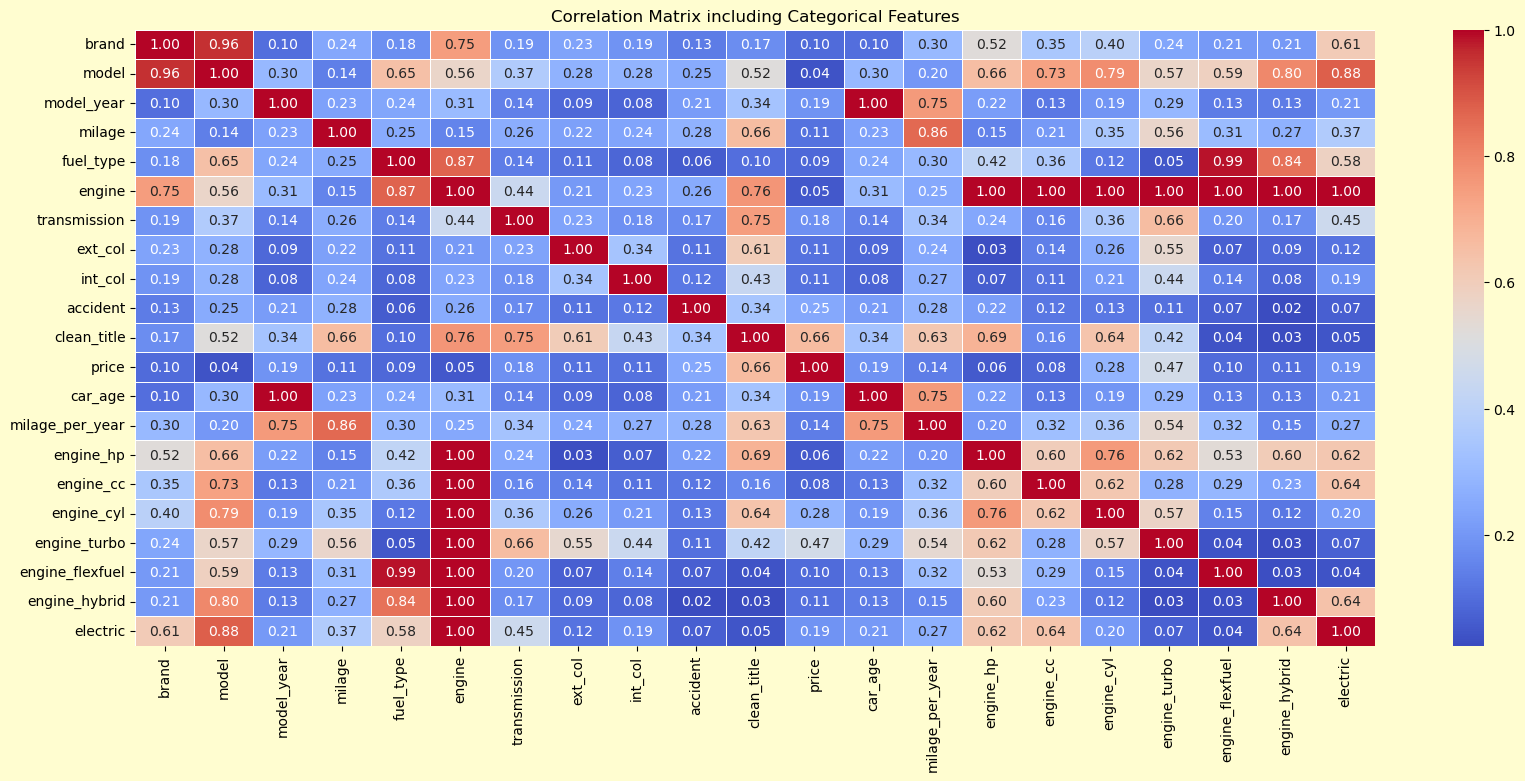

In [435]:
from dython.nominal import associations

associations_df = associations(df_train_cleaned, nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']
plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0') 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

## 5.4 Hypothesis testing

### **1️⃣ Determining the hypotheses to be tested** 🎯

1. **The effect of year of manufacture on car price**

- $H_0$ (null hypothesis): The average price of a car does not depend on year of manufacture.

- $H_A$ (alternative hypothesis): The average price of a car **depends** on year of manufacture.

2. **Do cars with different fuel types have significantly different prices?**

- $H_0$: The fuel type does not affect the average price.

- $H_A$: There is a significant price difference depending on the fuel.

3. **Does the number of kilometers driven (mileage) have a significant effect on price?**

- $H_0$: Mileage does not affect price.

- $H_A$: There is a significant correlation between mileage and price.

4. **Are cars after accidents cheaper than those without accidents?**

- $ H_0 $: There is no difference in price between cars after accidents and those without accidents.

- $ H_A $: Cars after accidents are significantly cheaper.

### **2️⃣ Selecting appropriate statistical tests** 🧪📊





The choice of test depends on the type of data:

| Analysis type | Statistical test |
|--------------|-----------------|
| Comparison of means for 2 groups | **Student's t-test** (or Mann-Whitney for non-normal data) |
| Comparison of means for more than 2 groups | **ANOVA** (or Kruskal-Wallis for non-normal data) |
| Relationship between two numerical variables | **Pearson/Spearman correlation** |
| Relationship between two categorical variables | **Chi-square test** |




### **3️⃣ Performing statistical tests in Python** 🐍



### **📌 1. Checking the impact of the year of production on the price**

Hypothesis: **Are younger cars more expensive?**

- Test: **Pearson/Spearman correlation** (because both variables are numerical) -> If **p-value < 0.05**, we reject $H_0$​, i.e. the year of production affects the price.

In [436]:
from scipy.stats import pearsonr, spearmanr

# Korelacja Pearson (jeśli dane są normalne)
pearson_corr, p_value = pearsonr(df_train_cleaned['car_age'], df_train_cleaned['price'])
print(f"Pearson correlation: {pearson_corr:.3f}, p-value: {p_value}")

# Korelacja Spearmana (jeśli dane nie są normalne)
spearman_corr, p_value = spearmanr(df_train_cleaned['car_age'], df_train_cleaned['price'])
print(f"Spearman correlation: {spearman_corr:.3f}, p-value: {p_value:.3f}")


Pearson correlation: -0.232, p-value: 0.0
Spearman correlation: -0.727, p-value: 0.000


- **We reject the null hypothesis ($H_0$)** – that is, **the number of kilometers traveled has a statistically significant effect on price**.

- **Spearman suggests a stronger relationship than Pearson** – this may mean that the relationship between mileage and price is not linear (e.g., accelerated depreciation after exceeding a certain mileage).

### **📌 2. The effect of fuel type on price**

Hypothesis: **Do different fuel types have a significant effect on price?**

- Test: **ANOVA** (for normal data) / **Kruskal-Wallis** (for abnormal) -> 🔹 If p-value < 0.05, then the fuel type affects the price.

In [437]:
from scipy.stats import f_oneway, kruskal

fuel_types = df_train_cleaned['fuel_type'].unique()
groups = [df_train_cleaned[df_train_cleaned['fuel_type'] == fuel]['price'] for fuel in fuel_types]

# Test ANOVA (dla normalnych danych)
anova_p_value = f_oneway(*groups).pvalue
print(f"ANOVA p-value: {anova_p_value:.3f}")

# Test Kruskala-Wallisa (jeśli dane nie są normalne)
kruskal_p_value = kruskal(*groups).pvalue
print(f"Kruskal-Wallis p-value: {kruskal_p_value:.3f}")


ANOVA p-value: 0.000
Kruskal-Wallis p-value: 0.000


#### **1\. ANOVA (Analysis of Variance)**

- Tests whether **the average values ​​of the car price differ between groups** (e.g. different years of production, brands, fuel types, etc.).

- **p-value ≈ 0** means that **the differences between groups are statistically significant** → the price differs depending on the category.

#### **2\. Kruskal-Wallis (nonparametric equivalent of ANOVA)**

- Tests whether **the price distributions differ between groups**, but **does not assume normality**.

- **p-value ≈ 0** means that **the differences between groups are very significant** → at least one group differs significantly from the others.

### **📌 3. Mileage Impact on Price**

Hypothesis: **Does Higher Mileage Mean Lower Price?**

- Test: **Pearson/Spearman Correlation** -> If p-value<0.05, the mileage has a significant impact on the price.

In [438]:
pearson_corr, p_value = pearsonr(df_train_cleaned['milage'], df_train_cleaned['price'])
print(f"Pearson correlation: {pearson_corr:.3f}, p-value: {p_value:.3f}")

spearman_corr, p_value = spearmanr(df_train_cleaned['milage'], df_train_cleaned['price'])
print(f"Spearman correlation: {spearman_corr:.3f}, p-value: {p_value:.3f}")


Pearson correlation: -0.283, p-value: 0.000
Spearman correlation: -0.743, p-value: 0.000




#### **1. Pearson Correlation: -0.283, p-value: 0.000**
- **The Pearson correlation value (-0.283)** suggests a **weak negative correlation** between mileage and price. This means that **higher mileage** tends to be associated with lower price**, but this relationship is not very strong.
- **p-value = 0.000** means that the result is **statistically significant** - there is **very strong support** that the correlation between mileage and price is not a coincidence. We can reject the null hypothesis that **there is no relationship**.

#### **2. Spearman Correlation: -0.743, p-value: 0.000**
- The **Spearman correlation value (-0.743)** suggests that the correlation between mileage and price is **strong and negative**, meaning that **higher mileage does indeed result in a lower price**.

- The Spearman correlation is more robust to outliers and works on **ranks**, so in the case of non-linear relationships it is a more appropriate measure than Pearson.

- The **p-value = 0.000** again confirms that the result is **highly statistically significant** and confirms that **this negative relationship is statistically significant**.

### **Conclusions:**
- The **Hypothesis: "Does higher mileage result in a lower price?"** was **confirmed** by both Pearson and Spearman correlations. There is a **negative relationship** between mileage and vehicle price, and the results are **statistically significant**.
- The **Pearson correlation** suggests that this relationship is weaker but still significant, while the **Spearman correlation** shows a stronger relationship, which may indicate a non-linear nature of the relationship.



### **📌 4. Are cars with accidents cheaper?**

Hypothesis: **Are cars with accidents cheaper?**

- Test: **Student's t-test / Mann-Whitney** (because 2 groups)

In [439]:
# Przekształcenie danych
df_train_cleaned['accident'] = df_train_cleaned['accident'].replace({
    'None reported': 'No', 
    'At least 1 accident or damage reported': 'Yes',
    'missing': 'Missing'
})

df_test_cleaned['accident'] = df_test_cleaned['accident'].replace({
    'None reported': 'No', 
    'At least 1 accident or damage reported': 'Yes',
    'missing': 'Missing'
})


# Usuwamy wiersze z brakującymi danymi w kolumnie 'accident'
# df_train_cleaned = df_train_cleaned[df_train_cleaned['accident'] != 'missing']

# Sprawdźmy, czy nie ma już brakujących danych
print(df_train_cleaned['accident'].value_counts())


accident
No         144514
Yes         41567
Missing      2452
Name: count, dtype: int64


#### a) **Test t-Studenta**:

Test t-Studenta sprawdza, czy średnie ceny samochodów z wypadkami różnią się od średnich cen samochodów bez wypadków. Jednak musisz najpierw upewnić się, że dane w obu grupach są rozkładem normalnym. Jeśli dane są normalne, możesz wykonać test t-Studenta.

Jeśli p-wartość jest mniejsza niż 0.05, oznacza to, że różnice między średnimi są statystycznie istotne.

#### b) **Test Manna-Whitneya**:

Jeśli dane nie są normalne, zamiast testu t-Studenta powinno się użyć testu Manna-Whitneya (test nieparametryczny). Test ten jest bardziej odpowiedni dla danych, które nie spełniają założeń normalności rozkładu.




In [326]:
from scipy.stats import ttest_ind, mannwhitneyu

accident_free = df_train_cleaned[df_train_cleaned['accident'] == 'No']['price']
accident_cars = df_train_cleaned[df_train_cleaned['accident'] == 'Yes']['price']

# Test t-Studenta (jeśli dane są normalne)
t_stat, p_value = ttest_ind(accident_free, accident_cars, equal_var=False)
print(f"T-test p-value: {p_value:.3f}")

# Test Manna-Whitneya (dla nienormalnych danych)
mann_stat, p_value = mannwhitneyu(accident_free, accident_cars)
print(f"Mann-Whitney p-value: {p_value:.3f}")


T-test p-value: 0.000
Mann-Whitney p-value: 0.000


Wyniki, które otrzymałeś, wskazują na to, że różnice między samochodami z wypadkami a samochodami bez wypadków są **statystycznie istotne**. P-wartości dla obu testów są znacznie mniejsze niż 0.05, co oznacza, że możemy odrzucić hipotezę zerową, która zakłada, że średnie ceny lub rozkłady cen samochodów z wypadkami i bez wypadków są takie same.

### Wnioski:
1. **T-test p-value: 0.000**  
   Oznacza to, że różnice między średnimi cenami samochodów z wypadkami i bez wypadków są statystycznie istotne. Samochody z wypadkami mają inną średnią cenę niż samochody bez wypadków.

2. **Mann-Whitney p-value: 0.000**  
   Test Manna-Whitneya również wskazuje, że różnice w rozkładach cen między tymi dwoma grupami są statystycznie istotne, nawet jeśli dane nie były rozkładem normalnym.

### Kolejne kroki:
- **Analiza praktyczna:** Niska cena samochodów po wypadkach sugeruje, że wyższy przebieg lub historia wypadkowa wpływa na cenę samochodów. Może to sugerować, że pojazdy po wypadkach są postrzegane jako mniej wartościowe.
  
- **Kontynuacja analizy:** Jeśli chcesz pogłębić analizę, możesz także sprawdzić, czy inne zmienne (np. wiek, marka) mają podobny wpływ na cenę, wykonując kolejne testy i analizy regresji.

Gratulacje! 🎯📊 Teraz masz solidne podstawy do dalszych analiz! Jeśli chcesz przejść do kolejnych etapów analizy, śmiało pytaj! 😊

## **4️⃣ Visualization of results** 📊

Let's add graphs for better understanding:

### **📌 Graph of price vs. year of production**

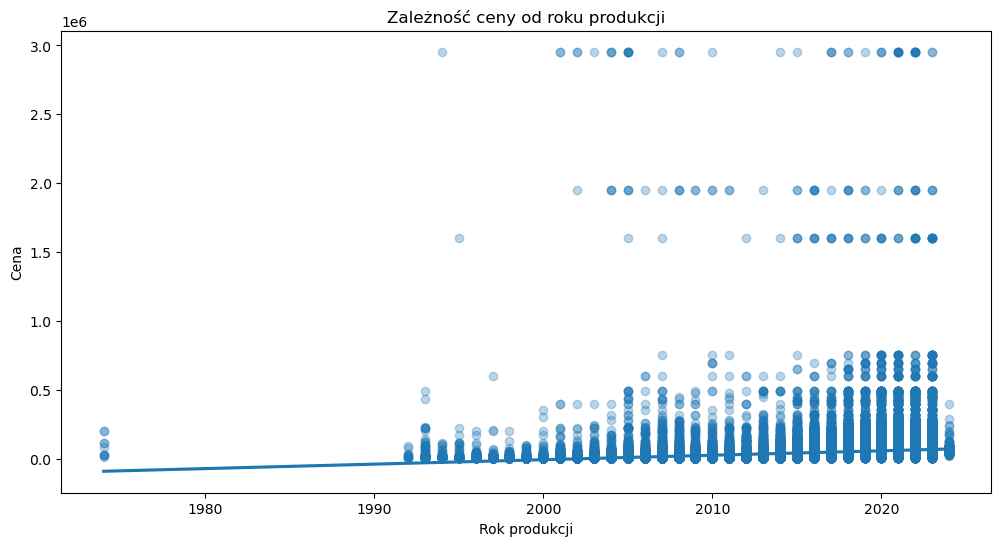

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.regplot(x=df_train_cleaned['model_year'].dt.year, y=df_train_cleaned['price'], scatter_kws={'alpha':0.3})
plt.title('Zależność ceny od roku produkcji')
plt.xlabel('Rok produkcji')
plt.ylabel('Cena')
plt.show()


### **📌 Boxplot of prices by fuel**

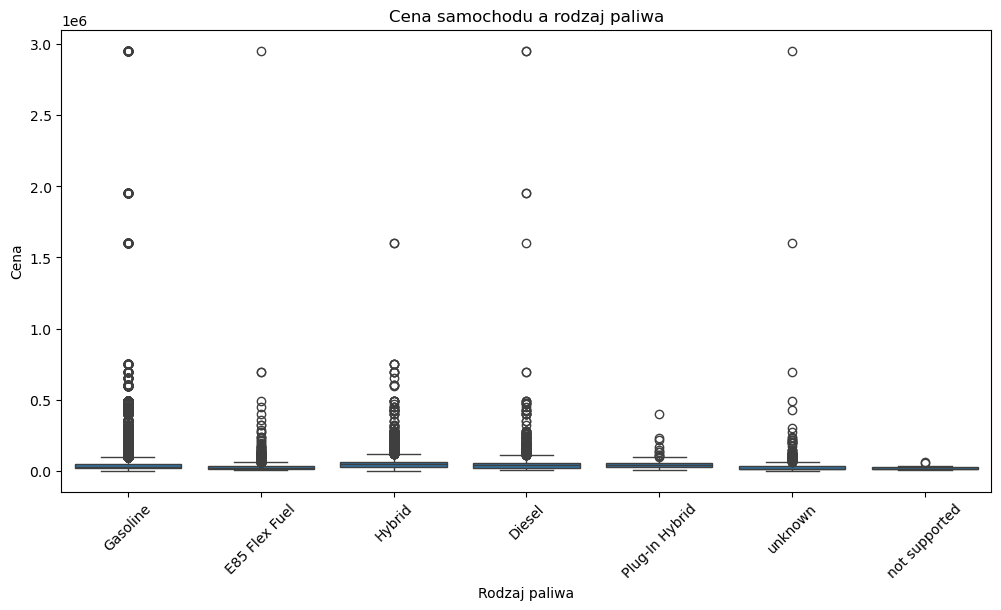

In [328]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_train_cleaned['fuel_type'], y=df_train_cleaned['price'])
plt.title('Cena samochodu a rodzaj paliwa')
plt.xlabel('Rodzaj paliwa')
plt.ylabel('Cena')
plt.xticks(rotation=45)
plt.show()


## **5️⃣ Interpretation of results and conclusions** 📄

After conducting tests, summarize the results:

- If p-value < 0.05 → null hypothesis rejected → a given feature affects the price.

- If p-value > 0.05 → no evidence of a significant effect of the feature on the price.

This is a key stage of the analysis - the test results will indicate which variables are important for predicting the price of a car! 🚀📊

# **6. Modeling**  

In [440]:
df_train_cleaned.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,price,car_age,milage_per_year,engine_hp,engine_cc,engine_cyl,engine_turbo,engine_flexfuel,engine_hybrid,electric
0,MINI,Cooper S Base,2007-01-01,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,No,...,4200,18,11833.33,172.0,1.6,4,False,False,False,False
1,Lincoln,LS V8,2002-01-01,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,Yes,...,4999,23,6228.26,252.0,3.9,8,False,False,False,False
2,Chevrolet,Silverado 2500 LT,2002-01-01,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,No,...,13900,23,5944.83,320.0,5.3,8,False,True,False,False
3,Genesis,G90 5.0 Ultimate,2017-01-01,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,No,...,45000,8,2437.50,420.0,5.0,8,False,False,False,False
4,Mercedes-benz,Metris Base,2021-01-01,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,No,...,97500,4,1847.00,208.0,2.0,4,False,False,False,False


In [441]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   brand            188533 non-null  object        
 1   model            188533 non-null  object        
 2   model_year       188533 non-null  datetime64[ns]
 3   milage           188533 non-null  int64         
 4   fuel_type        188533 non-null  object        
 5   engine           188533 non-null  object        
 6   transmission     188533 non-null  object        
 7   ext_col          188533 non-null  object        
 8   int_col          188533 non-null  object        
 9   accident         188533 non-null  object        
 10  clean_title      188533 non-null  object        
 11  price            188533 non-null  int64         
 12  car_age          188533 non-null  int32         
 13  milage_per_year  188533 non-null  float64       
 14  engine_hp        188

In [443]:
df_test_cleaned.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,car_age,milage_per_year,engine_hp,engine_cc,engine_cyl,engine_turbo,engine_flexfuel,engine_hybrid,electric
0,Land,Rover LR2 Base,2015-01-01,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,No,Yes,10,9800.00,172.0,1.6,4,False,False,False,False
1,Land,Rover Defender SE,2020-01-01,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,No,Yes,5,1828.40,252.0,3.9,8,False,False,True,True
2,Ford,Expedition Limited,2022-01-01,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,No,missing,3,9373.67,320.0,5.3,8,True,False,False,False
3,Audi,A6 2.0T Sport,2016-01-01,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,No,missing,9,6806.44,420.0,5.0,8,False,False,False,False
4,Audi,A6 2.0T Premium Plus,2018-01-01,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,No,Yes,7,8428.57,208.0,2.0,4,False,False,False,False


## 6.1 Preparing data to modeling

In [454]:
df_train_cleaned_copy = df_train_cleaned.copy()
df_test_cleaned_copy = df_test_cleaned.copy()

In [455]:
X_train = df_train_cleaned_copy.drop(columns=['price'])
y_train = df_train_cleaned_copy['price']

In [456]:
X_test = df_test_cleaned_copy

#### Scaling

**Numeric variables:** If we have numeric data that has different units or different ranges of values ​​(e.g. one variable has a range of 1 to 10 and another has a range of 1,000 to 10,000), it is worth scaling it so that the algorithm can compare them in equal units. 

In [335]:
num_cols = X_train.select_dtypes(include='number').columns.to_list()
num_cols

['milage',
 'car_age',
 'milage_per_year',
 'engine_hp',
 'engine_cc',
 'engine_cyl']

It will be done during building models

In [231]:
# from sklearn.preprocessing import StandardScaler

# num_cols = X_train.select_dtypes(include='number').columns.to_list()
# scaler = StandardScaler()

# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# X_test[num_cols] = scaler.transform(X_test[num_cols])

### Encoding

In [448]:
X_train.nunique()

brand                 52
model               1763
model_year            34
milage              6651
fuel_type              7
engine              1117
transmission          49
ext_col              290
int_col              147
accident               3
clean_title            2
car_age               34
milage_per_year    30311
engine_hp            349
engine_cc             62
engine_cyl             8
engine_turbo           2
engine_flexfuel        2
engine_hybrid          2
electric               2
dtype: int64

### Description

We have categorical variables that need to be **encoded** to numbers to be used in models. There are different encoding techniques depending on the type of variable and the algorithm:




#### 1. **Encoding with One-Hot Encoding**
**Recommended for variables with a small number of unique categories (e.g. `fuel_type`, `accident`, `engine_turbo`).**

**Description:**
- **One-Hot Encoding** is a process where each category is transformed into a new column with binary values ​​(0 or 1). Each category gets a new column, and the row contains 1 if the category is present, or 0 if it is not.
- This is a great approach when the number of unique categories is small, because it grows the dataset in a controlled way.

**Advantages:**
- It is very effective for categorical variables with a limited number of unique values.
- It avoids data ordering problems, because it does not create an artificial hierarchy.

**Disadvantages:**
- It can lead to high dimensionality (increased number of columns) for variables with a large number of unique categories (e.g. `model` or `engine`).

#### 2. **Label Encoding**
**Recommended for variables with a large number of unique categories that have no clear order (e.g. `model`, `engine`, `brand`).**

**Description:**
- **Label Encoding** assigns an integer to each unique category.
- This is a very efficient method when we have variables that can have a large number of unique categories.
- Ideal for variables that are nominal (have no natural order), but the number of categories is too large to use One-Hot Encoding.

**Advantages:**
- Very computationally efficient, since only one column is added to the dataset.
- Good for variables with a large number of unique categories.

**Disadvantages:**
- May introduce artificial order between categories, which may negatively affect models that assume order (e.g. linear models).


#### 3. **Target Encoding**
**Recommended for variables that may affect the target variable (e.g. `brand`, `model`, `engine`).**

**Description:**
- **Target Encoding** involves encoding a categorical variable based on the average value of the target variable for each category.
- It is an effective technique, especially in regression problems, when categorical variables may have a large impact on the value of the target variable.

**Advantages:**
- It often improves model performance because it includes information about the dependency between categories and the target variable.
- It is efficient for variables with a large number of unique values.

**Disadvantages:**
- It can lead to **data leakage** if not properly applied to categorical variables that should be encoded only based on training data (e.g. when used in cross-validation).

#### Summary of variable type dependencies:

| **Variable** | **Number of unique values** | **Suggested encoding method** |
|--------------|---------------------|--------------------------------------|
| `brand` | 52 | **Label Encoding** |
| `model` | 1763 | **Label Encoding** or **Target Encoding** |
| `fuel_type` | 7 | **One-Hot Encoding** |
| `engine` | 1116 | **Label Encoding** or **Target Encoding** |
| `transmission` | 49 | **One-Hot Encoding** |
| `accident` | 2 | **One-Hot Encoding** |
| `clean_title` | 2 | **One-Hot Encoding** |
| Other categorical variables (e.g. `ext_col`, `int_col`) | Variable depending on the number of categories | **Frequency Encoding** |


### Code

In [457]:
X_train = X_train.drop(['ext_col', 'int_col'], axis=1)
X_test = X_test.drop(['ext_col', 'int_col'], axis=1)

In [458]:
X_train['model_year'] = X_train['model_year'].dt.year
X_test['model_year'] = X_test['model_year'].dt.year

In [459]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cols_to_encode = ['fuel_type', 'accident', 'engine_turbo', 'clean_title']

X_train = pd.get_dummies(X_train, columns=cols_to_encode)
X_test = pd.get_dummies(X_test, columns=cols_to_encode)

In [460]:
X_train.columns.to_list()

['brand',
 'model',
 'model_year',
 'milage',
 'engine',
 'transmission',
 'car_age',
 'milage_per_year',
 'engine_hp',
 'engine_cc',
 'engine_cyl',
 'engine_flexfuel',
 'engine_hybrid',
 'electric',
 'fuel_type_Diesel',
 'fuel_type_E85 Flex Fuel',
 'fuel_type_Gasoline',
 'fuel_type_Hybrid',
 'fuel_type_Plug-In Hybrid',
 'fuel_type_not supported',
 'fuel_type_unknown',
 'accident_Missing',
 'accident_No',
 'accident_Yes',
 'engine_turbo_False',
 'engine_turbo_True',
 'clean_title_Yes',
 'clean_title_missing']

In [461]:
X_test.columns.to_list()

['brand',
 'model',
 'model_year',
 'milage',
 'engine',
 'transmission',
 'car_age',
 'milage_per_year',
 'engine_hp',
 'engine_cc',
 'engine_cyl',
 'engine_flexfuel',
 'engine_hybrid',
 'electric',
 'fuel_type_Diesel',
 'fuel_type_E85 Flex Fuel',
 'fuel_type_Gasoline',
 'fuel_type_Hybrid',
 'fuel_type_Plug-In Hybrid',
 'fuel_type_not supported',
 'fuel_type_unknown',
 'accident_Missing',
 'accident_No',
 'accident_Yes',
 'engine_turbo_False',
 'engine_turbo_True',
 'clean_title_Yes',
 'clean_title_missing']

In [462]:
from category_encoders import TargetEncoder
 
cols_to_encode = ['brand', 'model', 'engine', 'transmission']
col_target = 'price'

def target_encoder(df, cols_to_encode, y=None, encoder=None, is_train=True):

    if is_train:
        if y is None:
            raise ValueError("Dla zbioru treningowego musisz podać zmienną docelową (y)!")

        # Konwersja kolumn na kategorię
        df[cols_to_encode] = df[cols_to_encode].astype('category')

        encoder = TargetEncoder()
        df[cols_to_encode] = encoder.fit_transform(df[cols_to_encode], y)
        return df, encoder
    else:
        if encoder is None:
            raise ValueError("Dla zbioru testowego musisz podać wcześniej dopasowany encoder!")

        # Konwersja kolumn na kategorię
        df[cols_to_encode] = df[cols_to_encode].astype('category')

        df[cols_to_encode] = encoder.transform(df[cols_to_encode])
        return df


X_train, target_enc = target_encoder(X_train, cols_to_encode, y=y_train, is_train=True)
X_test = target_encoder(X_test, cols_to_encode, encoder=target_enc, is_train=False)

In [463]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['model_year']

def label_encoder(df, cols_to_encode):
    encoder = LabelEncoder()

    for col in cols_to_encode:
        df[col] = encoder.fit_transform(df[col])


label_encoder(X_train, cols_to_encode)

In [465]:
label_encoder(X_test, cols_to_encode)

In [464]:
X_train.columns.to_list()


['brand',
 'model',
 'model_year',
 'milage',
 'engine',
 'transmission',
 'car_age',
 'milage_per_year',
 'engine_hp',
 'engine_cc',
 'engine_cyl',
 'engine_flexfuel',
 'engine_hybrid',
 'electric',
 'fuel_type_Diesel',
 'fuel_type_E85 Flex Fuel',
 'fuel_type_Gasoline',
 'fuel_type_Hybrid',
 'fuel_type_Plug-In Hybrid',
 'fuel_type_not supported',
 'fuel_type_unknown',
 'accident_Missing',
 'accident_No',
 'accident_Yes',
 'engine_turbo_False',
 'engine_turbo_True',
 'clean_title_Yes',
 'clean_title_missing']

In [466]:
X_test.columns.to_list()

['brand',
 'model',
 'model_year',
 'milage',
 'engine',
 'transmission',
 'car_age',
 'milage_per_year',
 'engine_hp',
 'engine_cc',
 'engine_cyl',
 'engine_flexfuel',
 'engine_hybrid',
 'electric',
 'fuel_type_Diesel',
 'fuel_type_E85 Flex Fuel',
 'fuel_type_Gasoline',
 'fuel_type_Hybrid',
 'fuel_type_Plug-In Hybrid',
 'fuel_type_not supported',
 'fuel_type_unknown',
 'accident_Missing',
 'accident_No',
 'accident_Yes',
 'engine_turbo_False',
 'engine_turbo_True',
 'clean_title_Yes',
 'clean_title_missing']

In [241]:
# cols_to_encode = ['ext_col', 'int_col']

# def apply_frequency_encoding(df, cols_to_encode):
#     for col in cols_to_encode:
#         freq_map = df[col].value_counts(normalize=True)  # Tworzy mapę częstotliwości
#         df[col] = df[col].map(freq_map)  # Zamienia wartości na ich częstość
#     return df

# X_train = apply_frequency_encoding(X_train, cols_to_encode)
# X_test = apply_frequency_encoding(X_test, cols_to_encode)

## 6.2 Building predictive/classification models 

In [471]:
def train_and_evaluate_model(model_class, params, X_train, y_train, X_test, n_splits=3, scale=False):
    """
    Funkcja trenuje model przy użyciu KFold i oblicza RMSE dla każdego folda oraz ogólny RMSE.
    """

    # Skalowanie danych, jeśli wymagane
    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Przygotowanie tablic do przechowywania wyników
    predictions = np.zeros(len(X_train))
    true_labels = np.zeros(len(X_train))
    test_predictions = np.zeros(len(X_test))
    
    # Kroswalidacja
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
        print(f"Training fold {fold + 1}/{n_splits}...")
        
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        
        # Tworzenie modelu z przekazanymi parametrami
        model = model_class(**params)
        
        # Trenowanie modelu
        model.fit(X_fold_train, y_fold_train)
        
        # Predykcje na zbiorze walidacyjnym
        fold_preds = model.predict(X_fold_val)
        fold_test_preds = model.predict(X_test)
        
        predictions[val_idx] = fold_preds
        true_labels[val_idx] = y_fold_val
        test_predictions += fold_test_preds / n_splits
        
        fold_rmse = np.sqrt(mean_squared_error(y_fold_val, fold_preds))
        print(f"Fold {fold + 1} RMSE: {fold_rmse:.4f}")
    
    # Obliczanie ogólnego RMSE na treningu
    overall_rmse = np.sqrt(mean_squared_error(true_labels, predictions))
    print(f"Overall RMSE: {overall_rmse:.4f}")
    
    return overall_rmse, test_predictions


In [473]:
# Parametry dla LGBMRegressor
lgb_params = {
    'num_leaves': 426,
    'max_depth': 20,
    'learning_rate': 0.011353178352988012,
    'n_estimators': 10000,
    'metric': 'rmse',
    'subsample': 0.5772552201954328,
    'colsample_bytree': 0.9164865430101521,
    'reg_alpha': 1.48699088003429e-06,
    'reg_lambda': 0.41539458543414265,
    'min_data_in_leaf': 73,
    'feature_fraction': 0.751673655170548,
    'bagging_fraction': 0.5120415391590843,
    'bagging_freq': 2,
    'random_state': 42,
    'min_child_weight': 0.017236362383443497,
    'cat_smooth': 54.81317407769262,
    'verbose' : -1,
    'early_stopping_rounds': 200,
}

# Parametry dla XGBRegressor
xgb_params = {
    'lambda': 0.03880258557285165,
    'alpha': 0.02129832295514386,
    'colsample_bytree': 0.4,
    'subsample': 0.7,
    'learning_rate': 0.014,
    'max_depth': 17,
    'random_state': 2020,
    'min_child_weight': 85,
    'n_estimators': 10000
    # 'early_stopping_rounds': 200
}

# Parametry dla ElasticNet
en_params = {
    'alpha': 0.1,
    'l1_ratio': 0.5,
    'random_state': 42
}

# Parametry dla RandomForestRegressor
rf_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'random_state': 42
}

# Parametry dla AdaBoostRegressor
ada_params = {
    'n_estimators': 100,
    'learning_rate': 1.0,
    'random_state': 42
}

# Parametry dla DecisionTree
d_tree = {
    'max_depth': 5
}

# Parametry dla CatBoost
cat_params = {
    'iterations': 100, 
    'depth': 5, 
    'learning_rate': 0.1
}

In [474]:
models = [
    {'model': LinearRegression, 'params': {}},
    {'model': ElasticNet, 'params': en_params},
    {'model': DecisionTreeRegressor, 'params': d_tree},
    {'model': RandomForestRegressor, 'params': rf_params},
    {'model': AdaBoostRegressor, 'params': ada_params},
    {'model': XGBRegressor, 'params': xgb_params},
    {'model': LGBMRegressor, 'params': lgb_params},
    {'model': CatBoostRegressor, 'params': cat_params}
]


results = []

for model_info in models:
    model_class = model_info['model']
    params = model_info['params']

    # Sprawdzamy, czy model wymaga skalowania (np. liniowe modele)
    scale = isinstance(model_class, (LinearRegression, ElasticNet))
    
    # Trenujemy model i zapisujemy wyniki
    print(f"\nTraining {model_class.__class__.__name__}...")
    rmse, test_preds = train_and_evaluate_model(
        model_class, params, X_train, y_train, X_test, scale=scale
    )
    
    results.append({
        'model': model_class.__class__.__name__,
        'RMSE': rmse,
        'test_predictions': test_preds
    })


# Wyniki wszystkich modeli
for result in results:
    print(f"\n{result['model']} RMSE: {result['RMSE']:.4f}")


Training ABCMeta...
Training fold 1/3...
Fold 1 RMSE: 66953.1042
Training fold 2/3...
Fold 2 RMSE: 75433.2660
Training fold 3/3...
Fold 3 RMSE: 76266.4337
Overall RMSE: 73005.5961

Training ABCMeta...
Training fold 1/3...


/home/midabrow/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.616e+14, tolerance: 8.364e+10
  model = cd_fast.enet_coordinate_descent(


Fold 1 RMSE: 66958.7136
Training fold 2/3...


/home/midabrow/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.236e+14, tolerance: 7.578e+10
  model = cd_fast.enet_coordinate_descent(


Fold 2 RMSE: 75447.3457
Training fold 3/3...


/home/midabrow/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.197e+14, tolerance: 7.484e+10
  model = cd_fast.enet_coordinate_descent(


Fold 3 RMSE: 76278.6684
Overall RMSE: 73016.4207

Training ABCMeta...
Training fold 1/3...
Fold 1 RMSE: 67033.2748
Training fold 2/3...
Fold 2 RMSE: 75282.5847
Training fold 3/3...
Fold 3 RMSE: 76298.9996
Overall RMSE: 72989.6147

Training ABCMeta...
Training fold 1/3...
Fold 1 RMSE: 68547.1352
Training fold 2/3...
Fold 2 RMSE: 75686.7667
Training fold 3/3...
Fold 3 RMSE: 77705.9250
Overall RMSE: 74084.1742

Training ABCMeta...
Training fold 1/3...
Fold 1 RMSE: 132242.6215
Training fold 2/3...
Fold 2 RMSE: 159569.9083
Training fold 3/3...
Fold 3 RMSE: 110698.2623
Overall RMSE: 135652.4448

Training type...
Training fold 1/3...
Fold 1 RMSE: 72401.8404
Training fold 2/3...
Fold 2 RMSE: 79573.7702
Training fold 3/3...


KeyboardInterrupt: 

## 6.3 Evaluating results 

## 6.4 Insights and recommendations 